## This scripts generates Figure 2, Supplemental Figure 2, and corresponding data.   

Author: Kexin Dong  
Date: Apr 9, 2024  

# 0. Import packages  

In [2]:
import bioh2m as h2m
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial']

/Users/kexindong/Documents/GitHub/h2m-public/.conda/lib/python3.10/site-packages/Bio/pairwise2.py:278: BiopythonDeprecationWarning: Bio.pairwise2 has been deprecated, and we intend to remove it in a future release of Biopython. As an alternative, please consider using Bio.Align.PairwiseAligner as a replacement, and contact the Biopython developers if you still need the Bio.pairwise2 module.
  warnings.warn(


In [36]:
def label_numbers(numbers):
    last_number = None
    count = 0
    labeled_numbers = []

    for num in numbers:
        if num == last_number:
            count += 1
        else:
            count = 1
        last_number = num
        labeled_numbers.append(count)

    return labeled_numbers


def get_label(h,x):
    return f"{h}-M{x:02}"

# 1. Generate input data of H2M from downloaded raw data  

### (1) AACR-GENIE  
Downloaded from Synapse (https://www.synapse.org/#!Synapse:syn53210170)  

In [3]:
path_aacr = '/Users/kexindong/Documents/GitHub/Database/PublicDatabase/AACR-GENIE/v15.0/data_mutations_extended.txt'
df = h2m.cbio_reader(path_aacr, keep=True)
df = pd.DataFrame(df[['gene_name_h','tx_id_h','start_h','end_h','ref_seq_h','alt_seq_h','type_h']].value_counts()).reset_index(drop=False)
# count frequencies
len(df) #851088

851088

In [45]:
df['ID'] = [f"AACR-H{(x+1):07}" for x in list(range(len(df)))]

In [46]:
df.to_csv('/Users/kexindong/Documents/GitHub/Output/h2m_database/aacr_input_original.csv',index=False)

In [48]:
df, df_wrong = h2m.query_batch(df)
df

There were rows that could not be processed.


,gene_name_h,tx_id_h,start_h,end_h,ref_seq_h,alt_seq_h,type_h,count,ID,gene_name_m
0,ABCB1,ENST00000265724.3,87225124,87225124,T,-,DEL,2,AACR-H0155944,Abcb1a
1,ABCB1,ENST00000265724.3,87225124,87225124,T,-,DEL,2,AACR-H0155944,Abcb1b
2,ABCB1,ENST00000265724.3,87174220,87174221,-,C,INS,2,AACR-H0156000,Abcb1a
3,ABCB1,ENST00000265724.3,87174220,87174221,-,C,INS,2,AACR-H0156000,Abcb1b
4,ABCB1,ENST00000265724.3,87133531,87133531,A,T,SNP,1,AACR-H0260329,Abcb1a
...,...,...,...,...,...,...,...,...,...,...
894458,ZSWIM4,ENST00000254323.2,13923972,13923972,G,A,SNP,1,AACR-H0384705,Zswim4
894459,ZSWIM4,ENST00000254323.2,13928736,13928736,T,C,SNP,1,AACR-H0384706,Zswim4
894460,ZSWIM4,ENST00000254323.2,13928772,13928772,G,T,SNP,1,AACR-H0384707,Zswim4
894461,ZSWIM4,ENST00000254323.2,13930268,13930268,C,T,SNP,1,AACR-H0384708,Zswim4


In [49]:
l_1 = len(df['gene_name_h'].unique())
f'AACR-GENIE # genes mapped with mouse orthologs: {l_1}'

'AACR-GENIE # genes mapped with mouse orthologs: 1436'

In [50]:
l_1 = len(df_wrong['gene_name_h'].unique())
f'AACR-GENIE # genes not mapped with mouse orthologs: {l_1}'

'AACR-GENIE # genes not mapped with mouse orthologs: 196'

In [66]:
df['pro'] = df['M']/(df['M']+df['N'])

In [67]:
df

,M,N,pro
0,1436,196,0.879902
1,719,16,0.978231
2,17396,650,0.963981


In [63]:
df = pd.DataFrame({'M':[1436,719,17396],
              'N':[196,16,650]})

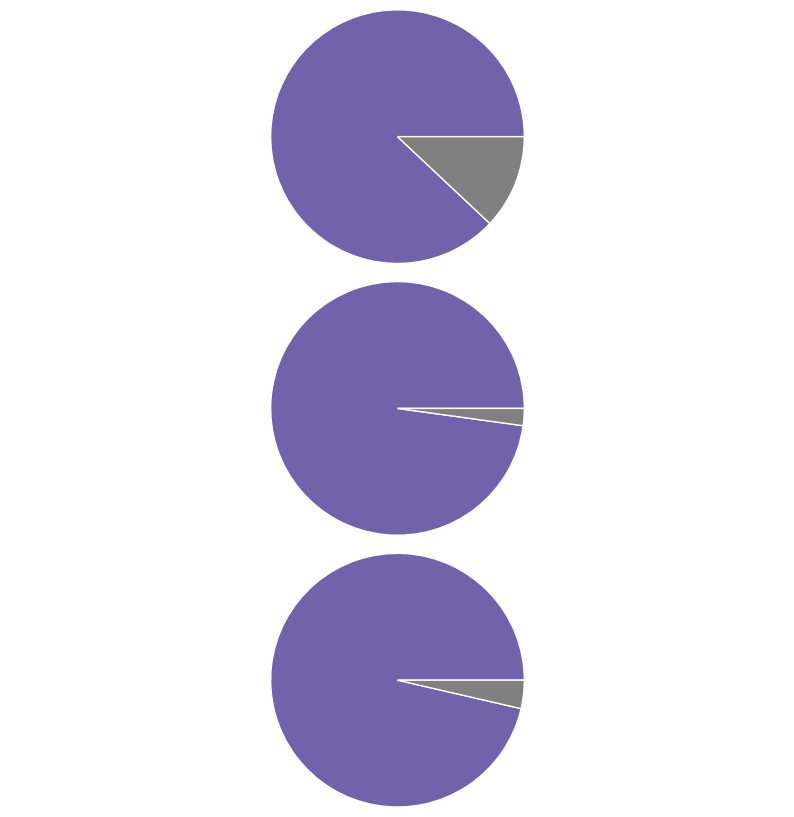

In [14]:
fig, ax = plt.subplots(figsize=(10,10), nrows = 3, ncols = 1)
for i, x in df.iterrows():
    name = x[0]
    ax_x = i%3
    m,n = x
    ax[ax_x].axis('equal')
    mypie2, _ = ax[ax_x].pie([m, n], radius=1.4, colors=[plt.cm.Purples(0.7),'grey'], startangle=0)
    plt.setp(mypie2, edgecolor='white')

plt.savefig(f'/Users/kexindong/Documents/GitHub/Output/h2m_database/figures/database/pie_plot_for_gene.svg', bbox_inches='tight')
plt.show()

In [ ]:
plt.cm.Purples(0.7)

In [51]:
df_wrong.to_csv('/Users/kexindong/Documents/GitHub/Output/h2m_database/aacr_without_homo_gene.csv',index=False)

In [52]:
df_wrong['gene_name_h'].unique()

array(['H3F3A', 'WHSC1', 'SAMD9', 'FAM175A', 'WISP3', 'GPR124', 'MKL1',
       'PARK2', 'MRE11A', 'MLLT4', 'C21orf128', 'CASC5', 'MEF2BNB-MEF2B',
       'PAK7', 'HIST1H1C', 'FAM46C', 'C11orf30', 'WHSC1L1', 'HIST1H3B',
       'SETD8', 'NKX2-1-AS1', 'LPHN3', 'C17orf70', 'BAI3', 'SEPT9',
       'HIST1H1E', 'PGBD3', 'HIST1H2BD', 'TERC', 'BRE', 'H3F3C', 'RFWD2',
       'TCEB1', 'GBA', 'PVRL4', 'HIST3H3', 'H19', 'RPL21P4', 'H3F3B',
       'CD58', 'ICK', 'C1orf147', 'HIST1H3D', 'HCG4P8', 'HIST1H3E',
       'HIST1H3J', 'AC068134.10', 'KLLN', 'HIST1H2BK', 'RUSC1-AS1',
       'PAX8-AS1', 'TAZ', 'T', 'HIST1H3F', 'RP11-322N21.2',
       'RP11-244F12.3', 'FAM58A', 'GNB2L1', 'LAMB4', 'HIST1H1B', 'CLTCL1',
       'CTD-2267D19.2', 'C1orf86', 'C19orf40', 'MGEA5', 'MIR4457',
       'HIST1H1D', 'C11orf95', 'IFIT1P1', 'MT-TL2', 'C9orf66',
       'C7orf55-LUC7L2', 'HIST2H3D', 'PAXIP1-AS2', 'TRAJ54', 'RPL21P122',
       'IGHJ5', 'IGHD3-10', 'RP11-288G3.4', 'EGFR-AS1', 'HIST1H2AC',
       'HLA-DPB2', 'HIST1H

In [53]:
df,df_wrong = h2m.get_tx_batch(df, species='m')
df

No error occurs.


,gene_name_h,tx_id_h,start_h,end_h,ref_seq_h,alt_seq_h,type_h,count,ID,gene_name_m,tx_id_m
0,ABCB1,ENST00000265724.3,87225124,87225124,T,-,DEL,2,AACR-H0155944,Abcb1a,ENSMUST00000047753.5
1,ABCB1,ENST00000265724.3,87225124,87225124,T,-,DEL,2,AACR-H0155944,Abcb1b,ENSMUST00000009058.10
2,ABCB1,ENST00000265724.3,87174220,87174221,-,C,INS,2,AACR-H0156000,Abcb1a,ENSMUST00000047753.5
3,ABCB1,ENST00000265724.3,87174220,87174221,-,C,INS,2,AACR-H0156000,Abcb1b,ENSMUST00000009058.10
4,ABCB1,ENST00000265724.3,87133531,87133531,A,T,SNP,1,AACR-H0260329,Abcb1a,ENSMUST00000047753.5
...,...,...,...,...,...,...,...,...,...,...,...
894458,ZSWIM4,ENST00000254323.2,13923972,13923972,G,A,SNP,1,AACR-H0384705,Zswim4,ENSMUST00000039480.7
894459,ZSWIM4,ENST00000254323.2,13928736,13928736,T,C,SNP,1,AACR-H0384706,Zswim4,ENSMUST00000039480.7
894460,ZSWIM4,ENST00000254323.2,13928772,13928772,G,T,SNP,1,AACR-H0384707,Zswim4,ENSMUST00000039480.7
894461,ZSWIM4,ENST00000254323.2,13930268,13930268,C,T,SNP,1,AACR-H0384708,Zswim4,ENSMUST00000039480.7


In [54]:
numbers = label_numbers(df['ID'])
df['ID'] = [get_label(h,x) for h,x in zip(df['ID'],numbers)]

In [55]:
df

,gene_name_h,tx_id_h,start_h,end_h,ref_seq_h,alt_seq_h,type_h,count,ID,gene_name_m,tx_id_m
0,ABCB1,ENST00000265724.3,87225124,87225124,T,-,DEL,2,AACR-H0155944-M01,Abcb1a,ENSMUST00000047753.5
1,ABCB1,ENST00000265724.3,87225124,87225124,T,-,DEL,2,AACR-H0155944-M02,Abcb1b,ENSMUST00000009058.10
2,ABCB1,ENST00000265724.3,87174220,87174221,-,C,INS,2,AACR-H0156000-M01,Abcb1a,ENSMUST00000047753.5
3,ABCB1,ENST00000265724.3,87174220,87174221,-,C,INS,2,AACR-H0156000-M02,Abcb1b,ENSMUST00000009058.10
4,ABCB1,ENST00000265724.3,87133531,87133531,A,T,SNP,1,AACR-H0260329-M01,Abcb1a,ENSMUST00000047753.5
...,...,...,...,...,...,...,...,...,...,...,...
894458,ZSWIM4,ENST00000254323.2,13923972,13923972,G,A,SNP,1,AACR-H0384705-M01,Zswim4,ENSMUST00000039480.7
894459,ZSWIM4,ENST00000254323.2,13928736,13928736,T,C,SNP,1,AACR-H0384706-M01,Zswim4,ENSMUST00000039480.7
894460,ZSWIM4,ENST00000254323.2,13928772,13928772,G,T,SNP,1,AACR-H0384707-M01,Zswim4,ENSMUST00000039480.7
894461,ZSWIM4,ENST00000254323.2,13930268,13930268,C,T,SNP,1,AACR-H0384708-M01,Zswim4,ENSMUST00000039480.7


In [122]:
df = df.rename(columns={'ID':'index'})
len(df['index'].unique())

894463

In [124]:
df.to_csv('/Users/kexindong/Documents/GitHub/Output/h2m_database/aacr_input.csv',index=False)

#### Correct gene symbols and add-ons  

Histone proteins, G protein-coupled receptors, 
NO MOUSE ORTHOLOG: GPR32, RPL21P4 (pseudogene), hcg4p8 (pseudogene), CLTCL1, IFIT1P1 (pseudogene), Prkacg, segments of the T-cell receptor alpha joining (TRAJ) gene TRAJ59.  TCRs. 

In [7]:
df[df['gene_name_h']=='HIST1H3B']

,gene_name_h,tx_id_h,start_h,end_h,ref_seq_h,alt_seq_h,type_h,count
3196,HIST1H3B,ENST00000244661.2,26032206,26032206,T,A,SNP,29
3426,HIST1H3B,ENST00000244661.2,26032069,26032069,C,T,SNP,28
3520,HIST1H3B,ENST00000244661.2,26031973,26031973,C,T,SNP,27
4045,HIST1H3B,ENST00000244661.2,26032069,26032069,C,G,SNP,24
4202,HIST1H3B,ENST00000244661.2,26031973,26031973,C,G,SNP,23
...,...,...,...,...,...,...,...,...
844852,HIST1H3B,ENST00000244661.2,26032113,26032113,G,A,SNP,1
844853,HIST1H3B,ENST00000244661.2,26032114,26032114,T,C,SNP,1
844854,HIST1H3B,ENST00000244661.2,26032116,26032116,G,C,SNP,1
844855,HIST1H3B,ENST00000244661.2,26032116,26032116,G,T,SNP,1


In [19]:
for i,x in enumerate(['HIST1H1E','HIST1H2BD','HIST3H3','HIST1H3D','HIST1H3E','HIST1H3J',
                      'HIST1H2BK','HIST1H3F','HIST1H1B','HIST1H1D','HIST2H3D','HIST1H2AC',
                      'HIST1H2BC','HIST1H2BJ','HIST1H4E']):
    print(i)
    tx = df[df['gene_name_h']==x].reset_index(drop=True)['tx_id_h'][0]
    print(f'{dict_of_aacr_symbol[x]}\n{tx}')

0
H1-4
ENST00000304218.3
1
H2BC5
ENST00000289316.2
2
H3-4
ENST00000366696.1
3
H3C2
ENST00000356476.2
4
H3C3
ENST00000360408.1
5
H3C12
ENST00000359303.2
6
H2BC8
ENST00000356950.1
7
H3C4
ENST00000446824.2
8
H1-5
ENST00000331442.3
9
H1-3
ENST00000244534.5
10
H3-6
ENST00000331491.1
11
H2AC1
ENST00000314088.6
12
H2BC2
ENST00000314332.5
13
H2BC13
ENST00000339812.2
14
H4C5
ENST00000360441.4


In [18]:
dict_of_aacr_symbol = {
    'H3F3A':'H3-3A',
    'H3F3B':'H3-3B',
    'WHSC1':'NSD1',
    'GPR124':'ADGRA2',
    'MKL1':'MRTFA',
    'PARK2':'PRKN',
    'MRE11A':'MRE11',
    'MLLT4':'AFDN',
    'CASC5': 'KNL1',
    'MEF2BNB-MEF2B':'BORCS8-MEF2B',
    'PAK7':'PAK5',
    'HIST1H1C':'H1-2',
    'HIST1H3B': 'H3C1',
    'HIST1H1E': 'H1-4',
    'HIST1H2BD': 'H2BC5',
    'HIST3H3': 'H3-4',
    'HIST1H3D': 'H3C2',
    'HIST1H3E': 'H3C3',
    'HIST1H3J': 'H3C12',
    'HIST1H2BK': 'H2BC8',
    'HIST1H3F': 'H3C4',
    'HIST1H1B': 'H1-5',
    'HIST1H1D': 'H1-3',
    'HIST2H3D': 'H3-6',
    'HIST1H2AC': 'H2AC1',
    'HIST1H2BC': 'H2BC2',
    'HIST1H2BJ': 'H2BC13',
    'HIST1H4E': 'H4C5',
    'FAM46C':'TENT5C',
    'WHSC1L1':'NSD3',
    'SETD8':'KMT5A',
    'LPHN3':'ADGRL3',
    'BAI3':'ADGRB3',
    'SEPT9':'NAPB',
    'BRE':'BABAM2',
    'RFWD2':'COP1',
    'TCEB1':'ELOC',
    'GBA':'GBA1',
    'PVRL4':'NECTIN4',
    'ICK':'GCKR',
    'GNB2L1':'RACK1',
    'MGEA5':'OGA',
    'DIRC2':'SLC49A4',
    'LARGE':'LARGE1',
    'TMEM173B':'STING1'
    }

In [ ]:
list_of_aacr_none = ['H3F3A', 'WHSC1', 'SAMD9', 'FAM175A', 'WISP3', 'GPR124', 'MKL1',
       'PARK2', 'MRE11A', 'MLLT4', 'C21orf128', 'CASC5', 'MEF2BNB-MEF2B',
       'PAK7', 'HIST1H1C', 'FAM46C', 'C11orf30', 'WHSC1L1', 'HIST1H3B',
       'SETD8', 'NKX2-1-AS1', 'LPHN3', 'C17orf70', 'BAI3', 'SEPT9',
       'HIST1H1E', 'PGBD3', 'HIST1H2BD', 'TERC', 'BRE', 'H3F3C', 'RFWD2',
       'TCEB1', 'GBA', 'PVRL4', 'HIST3H3', 'H19', 'RPL21P4', 'H3F3B',
       'CD58', 'ICK', 'C1orf147', 'HIST1H3D', 'HCG4P8', 'HIST1H3E',
       'HIST1H3J', 'AC068134.10', 'KLLN', 'HIST1H2BK', 'RUSC1-AS1',
       'PAX8-AS1', 'TAZ', 'T', 'HIST1H3F', 'RP11-322N21.2',
       'RP11-244F12.3', 'FAM58A', 'GNB2L1', 'LAMB4', 'HIST1H1B', 'CLTCL1',
       'CTD-2267D19.2', 'C1orf86', 'C19orf40', 'MGEA5', 'MIR4457',
       'HIST1H1D', 'C11orf95', 'IFIT1P1', 'MT-TL2', 'C9orf66',
       'C7orf55-LUC7L2', 'HIST2H3D', 'PAXIP1-AS2', 'TRAJ54', 'RPL21P122',
       'IGHJ5', 'IGHD3-10', 'RP11-288G3.4', 'EGFR-AS1', 'HIST1H2AC',
       'HLA-DPB2', 'HIST1H2BC', 'MT-TS2', 'ZNF331', 'AC004041.2',
       'HLA-DRB6', 'IGLJ6', 'IGHJ6', 'DIRC2', 'ZNF620', 'GPR32',
       'AC004906.3', 'AC005009.2', 'RP11-366L20.2', 'RP11-383G6.4',
       'RPL23AP1', 'RTEL1-TNFRSF6B', 'RP11-145E5.5', 'RP11-149I2.5',
       'PRKACG', 'KB-67B5.12', 'LARGE', 'C2orf44', 'C9orf129', 'C10orf54',
       'TRAJ59', 'TRAJ46', 'TRAJ41', 'TRAJ13', 'TRGJP', 'P2RY8',
       'HIF1A-AS2', 'HIST1H2BJ', 'CDKN2B-AS1', 'NTRK3-AS1', 'SNORD95',
       'TMEM173', 'TRAJ7', 'TRAJ57', 'TRAJ58', 'TRAJ6', 'TRAJ8', 'TRAJ9',
       'TRAJ52', 'TRGJP1', 'TRGJP2', 'TRBJ2-2', 'TRBJ2-2P', 'TRBJ2-3',
       'TRBJ2-6', 'TRGJ2', 'TRAJ50', 'TRAJ28', 'TRAJ29', 'TRAJ32',
       'TRAJ39', 'TRAJ42', 'TRAJ47', 'TRAJ49', 'TRAJ26', 'TRAJ25',
       'TRAJ10', 'TRAJ23', 'TRAJ16', 'TRAJ17', 'TRAJ18', 'TRAJ22',
       'SLC9A3R1', 'RPEP4', 'RP11-664D7.4', 'RP11-35G9.3', 'RP11-380G5.3',
       'RP11-461L13.2', 'RP11-770J1.3', 'RP11-811P12.3', 'RP11-848P1.5',
       'RP5-991G20.1', 'RP11-227F19.1', 'RP11-126O1.5', 'RP11-103C16.2',
       'RP1-118J21.5', 'RP1-1J6.2', 'RN7SL263P', 'CTD-2047H16.4',
       'CBX3P3', 'CD3EAP', 'AL590763.5', 'ACTA2-AS1', 'AP003419.16',
       'CARS', 'LINC00894', 'JAZF1-AS1', 'MIR3960', 'MIR4728', 'MIR5196',
       'MIR636', 'MTOR-AS1', 'MYB-AS1', 'LYRM5', 'MDC1-AS1', 'FGFR1OP',
       'FBXW4P1', 'IGHJ4', 'IGHJ2', 'IGHJ3', 'IGHD3-9', 'IGLJ3', 'IGLJ5',
       'IGLJ7', 'HLA-DQB1-AS1', 'HLA-DPB1', 'HLA-DPA1', 'HLA-F-AS1',
       'HIST1H4E', 'HCG4P5']

### (2) COSMIC  
Downloaded from COSMIC website (https://cancer.sanger.ac.uk/cosmic/download/cosmic/v99/mutantcensus)  

In [57]:
df_cosmic = pd.read_csv('/Users/kexindong/Documents/GitHub/Database/PublicDatabase/COSMIC/Cosmic_MutantCensus_Tsv_v99_GRCh37/Cosmic_MutantCensus_v99_GRCh37.tsv', sep='\t')
df_cosmic = df_cosmic.drop_duplicates()
df_cosmic['GENOMIC_WT_ALLELE'] = df_cosmic['GENOMIC_WT_ALLELE'].fillna('')
df_cosmic['GENOMIC_MUT_ALLELE'] = df_cosmic['GENOMIC_MUT_ALLELE'].fillna('')
df_cosmic = df_cosmic[['GENE_SYMBOL','TRANSCRIPT_ACCESSION','GENOME_START','GENOME_STOP','GENOMIC_WT_ALLELE','GENOMIC_MUT_ALLELE','MUTATION_ID']]

In [58]:
df_cosmic.columns = ['gene_name_h','tx_id_h','start_h','end_h','ref_seq_h','alt_seq_h','cosmic_ID']

In [59]:
df_cosmic

,gene_name_h,tx_id_h,start_h,end_h,ref_seq_h,alt_seq_h,cosmic_ID
0,MYOD1,ENST00000250003.3,17741555.0,17741556.0,,CCTCA,20866010
1,MYOD1,ENST00000250003.3,17742468.0,17742468.0,C,,20866012
2,MYOD1,ENST00000250003.3,17741690.0,17741690.0,C,T,20866014
3,MYOD1,ENST00000250003.3,17741428.0,17741428.0,G,A,20865978
4,MYOD1,ENST00000250003.3,17742960.0,17742960.0,G,A,20866016
...,...,...,...,...,...,...,...
1897039,NFKBIE,ENST00000275015.5,NaN,NaN,,,184763869
1897040,ASXL1,ENST00000375687.4,NaN,NaN,,,184754753
1897041,ASXL1,ENST00000375687.4,NaN,NaN,,,184754753
1897042,ASXL1,ENST00000375687.4,NaN,NaN,,,184754753


In [60]:
df_cosmic['type_h'] = [h2m.get_type(x,y) for x,y in zip(df_cosmic['ref_seq_h'], df_cosmic['alt_seq_h'])]
df_cosmic = df_cosmic[['gene_name_h','tx_id_h','start_h','end_h','ref_seq_h','alt_seq_h','type_h','cosmic_ID']]
df_cosmic = df_cosmic.dropna(subset=['start_h','end_h'])

In [61]:
df_cosmic['ID'] = [f"COSMIC-H{(x+1):07}" for x in list(range(len(df_cosmic)))]
df_cosmic

,gene_name_h,tx_id_h,start_h,end_h,ref_seq_h,alt_seq_h,type_h,cosmic_ID,ID
0,MYOD1,ENST00000250003.3,17741555.0,17741556.0,,CCTCA,INS,20866010,COSMIC-H0000001
1,MYOD1,ENST00000250003.3,17742468.0,17742468.0,C,,DEL,20866012,COSMIC-H0000002
2,MYOD1,ENST00000250003.3,17741690.0,17741690.0,C,T,SNP,20866014,COSMIC-H0000003
3,MYOD1,ENST00000250003.3,17741428.0,17741428.0,G,A,SNP,20865978,COSMIC-H0000004
4,MYOD1,ENST00000250003.3,17742960.0,17742960.0,G,A,SNP,20866016,COSMIC-H0000005
...,...,...,...,...,...,...,...,...,...
1895470,LYN,ENST00000519728.1,56863058.0,56863058.0,A,C,SNP,76559148,COSMIC-H1771597
1895471,LYN,ENST00000519728.1,56916981.0,56916981.0,T,C,SNP,76555762,COSMIC-H1771598
1895472,LYN,ENST00000519728.1,56922493.0,56922493.0,G,A,SNP,76559152,COSMIC-H1771599
1895473,LYN,ENST00000519728.1,56912024.0,56912024.0,G,A,SNP,76559154,COSMIC-H1771600


In [62]:
df_cosmic.to_csv('/Users/kexindong/Documents/GitHub/Output/h2m_database/cosmic_input_original.csv',index=False)

In [63]:
df_cosmic, df_wrong = h2m.query_batch(df_cosmic)
df_cosmic

There were rows that could not be processed.


,gene_name_h,tx_id_h,start_h,end_h,ref_seq_h,alt_seq_h,type_h,cosmic_ID,ID,gene_name_m
0,A1CF,ENST00000373995.3,52570740.0,52570740.0,C,T,SNP,38273025,COSMIC-H0056496,A1cf
1,A1CF,ENST00000373995.3,52566444.0,52566444.0,T,,DEL,38273035,COSMIC-H0056497,A1cf
2,A1CF,ENST00000373995.3,52595946.0,52595946.0,G,A,SNP,38270819,COSMIC-H0056498,A1cf
3,A1CF,ENST00000373995.3,52601695.0,52601695.0,A,T,SNP,38273050,COSMIC-H0056499,A1cf
4,A1CF,ENST00000373995.3,52572755.0,52572755.0,C,A,SNP,38273056,COSMIC-H0056500,A1cf
...,...,...,...,...,...,...,...,...,...,...
1929402,ZRSR2,ENST00000307771.7,15833958.0,15833958.0,T,A,SNP,25670786,COSMIC-H0925849,Zrsr2-ps1
1929403,ZRSR2,ENST00000307771.7,15838385.0,15838385.0,C,T,SNP,25670792,COSMIC-H0925850,Zrsr2
1929404,ZRSR2,ENST00000307771.7,15838385.0,15838385.0,C,T,SNP,25670792,COSMIC-H0925850,Zrsr2-ps1
1929405,ZRSR2,ENST00000307771.7,15841057.0,15841058.0,,AA,INS,25670796,COSMIC-H0925851,Zrsr2


In [65]:
l_1 = len(df_cosmic['gene_name_h'].unique())
f'COSMIC # genes mapped with mouse orthologs: {l_1}'

'COSMIC # genes mapped with mouse orthologs: 719'

In [66]:
l_1 = len(df_wrong['gene_name_h'].unique())
f'COSMIC # genes not mapped with mouse orthologs: {l_1}'

'COSMIC # genes not mapped with mouse orthologs: 16'

In [67]:
df_wrong.to_csv('/Users/kexindong/Documents/GitHub/Output/h2m_database/cosmic_without_homo_gene.csv',index=False)

In [68]:
df_wrong['gene_name_h'].unique()

array(['HIST1H3B', 'ZNF479', 'CARS', 'C15orf65', 'CLTCL1', 'FGFR1OP',
       'ZNF331', 'HIST1H4I', 'SEPT5', 'H3F3A', 'H3F3B', 'SEPT9', 'MDS2',
       'SEPT6', 'P2RY8', 'FCRL4'], dtype=object)

In [70]:
df_cosmic,df_wrong = h2m.get_tx_batch(df_cosmic, species='m')
df_cosmic

No error occurs.


,gene_name_h,tx_id_h,start_h,end_h,ref_seq_h,alt_seq_h,type_h,cosmic_ID,ID,gene_name_m,tx_id_m
0,A1CF,ENST00000373995.3,52570740.0,52570740.0,C,T,SNP,38273025,COSMIC-H0056496,A1cf,ENSMUST00000075838.8
1,A1CF,ENST00000373995.3,52566444.0,52566444.0,T,,DEL,38273035,COSMIC-H0056497,A1cf,ENSMUST00000075838.8
2,A1CF,ENST00000373995.3,52595946.0,52595946.0,G,A,SNP,38270819,COSMIC-H0056498,A1cf,ENSMUST00000075838.8
3,A1CF,ENST00000373995.3,52601695.0,52601695.0,A,T,SNP,38273050,COSMIC-H0056499,A1cf,ENSMUST00000075838.8
4,A1CF,ENST00000373995.3,52572755.0,52572755.0,C,A,SNP,38273056,COSMIC-H0056500,A1cf,ENSMUST00000075838.8
...,...,...,...,...,...,...,...,...,...,...,...
1929402,ZRSR2,ENST00000307771.7,15833958.0,15833958.0,T,A,SNP,25670786,COSMIC-H0925849,Zrsr2-ps1,ENSMUST00000229075.2
1929403,ZRSR2,ENST00000307771.7,15838385.0,15838385.0,C,T,SNP,25670792,COSMIC-H0925850,Zrsr2,ENSMUST00000112289.9
1929404,ZRSR2,ENST00000307771.7,15838385.0,15838385.0,C,T,SNP,25670792,COSMIC-H0925850,Zrsr2-ps1,ENSMUST00000229075.2
1929405,ZRSR2,ENST00000307771.7,15841057.0,15841058.0,,AA,INS,25670796,COSMIC-H0925851,Zrsr2,ENSMUST00000112289.9


In [71]:
numbers = label_numbers(df_cosmic['ID'])
df_cosmic['ID'] = [get_label(h,x) for h,x in zip(df_cosmic['ID'],numbers)]

In [72]:
df_cosmic

,gene_name_h,tx_id_h,start_h,end_h,ref_seq_h,alt_seq_h,type_h,cosmic_ID,ID,gene_name_m,tx_id_m
0,A1CF,ENST00000373995.3,52570740.0,52570740.0,C,T,SNP,38273025,COSMIC-H0056496-M01,A1cf,ENSMUST00000075838.8
1,A1CF,ENST00000373995.3,52566444.0,52566444.0,T,,DEL,38273035,COSMIC-H0056497-M01,A1cf,ENSMUST00000075838.8
2,A1CF,ENST00000373995.3,52595946.0,52595946.0,G,A,SNP,38270819,COSMIC-H0056498-M01,A1cf,ENSMUST00000075838.8
3,A1CF,ENST00000373995.3,52601695.0,52601695.0,A,T,SNP,38273050,COSMIC-H0056499-M01,A1cf,ENSMUST00000075838.8
4,A1CF,ENST00000373995.3,52572755.0,52572755.0,C,A,SNP,38273056,COSMIC-H0056500-M01,A1cf,ENSMUST00000075838.8
...,...,...,...,...,...,...,...,...,...,...,...
1929402,ZRSR2,ENST00000307771.7,15833958.0,15833958.0,T,A,SNP,25670786,COSMIC-H0925849-M02,Zrsr2-ps1,ENSMUST00000229075.2
1929403,ZRSR2,ENST00000307771.7,15838385.0,15838385.0,C,T,SNP,25670792,COSMIC-H0925850-M01,Zrsr2,ENSMUST00000112289.9
1929404,ZRSR2,ENST00000307771.7,15838385.0,15838385.0,C,T,SNP,25670792,COSMIC-H0925850-M02,Zrsr2-ps1,ENSMUST00000229075.2
1929405,ZRSR2,ENST00000307771.7,15841057.0,15841058.0,,AA,INS,25670796,COSMIC-H0925851-M01,Zrsr2,ENSMUST00000112289.9


In [73]:
df_cosmic = df_cosmic.rename(columns={'ID':'index'})

In [74]:
df_cosmic.to_csv('/Users/kexindong/Documents/GitHub/Output/h2m_database/cosmic_input.csv',index=False)

### (3) ClinVar  
Downloaded from ClinVar FTP Site (https://ftp.ncbi.nlm.nih.gov/pub/clinvar/)  

Read from vcf file  

In [171]:
path = '/Users/kexindong/Documents/GitHub/Database/PublicDatabase/ClinVar/GRCh37_clinvar_20240206.vcf.gz'
df_clinvar = h2m.clinvar_reader(path,keep=True)
df_clinvar = h2m.clinvar_to_maf(df_clinvar)

[E::idx_find_and_load] Could not retrieve index file for '/Users/kexindong/Documents/GitHub/Database/PublicDatabase/ClinVar/GRCh37_clinvar_20240206.vcf.gz'
[W::vcf_parse] Contig '1' is not defined in the header. (Quick workaround: index the file with tabix.)
[W::vcf_parse] Contig '2' is not defined in the header. (Quick workaround: index the file with tabix.)
[W::vcf_parse] Contig '3' is not defined in the header. (Quick workaround: index the file with tabix.)
[W::vcf_parse] Contig '4' is not defined in the header. (Quick workaround: index the file with tabix.)
[W::vcf_parse] Contig '5' is not defined in the header. (Quick workaround: index the file with tabix.)
[W::vcf_parse] Contig '6' is not defined in the header. (Quick workaround: index the file with tabix.)
[W::vcf_parse] Contig '7' is not defined in the header. (Quick workaround: index the file with tabix.)
[W::vcf_parse] Contig '8' is not defined in the header. (Quick workaround: index the file with tabix.)
[W::vcf_parse] Conti

In [172]:
df_clinvar = df_clinvar.rename(columns={'ID':'clinvar_id'})
df_clinvar['ID'] = [f"CLINVAR-H{(x+1):07}" for x in list(range(len(df_clinvar)))]
df_clinvar

,index,gene_name_h,Chromosome,start_h,end_h,ref_seq_h,alt_seq_h,type_h,Variation_ID,Allele_ID,CLNSIG,CLNHGVS,CLNDN,clinvar_id,format,ID
0,0,OR4F5,1,69134,69134,A,G,SNP,2205837,2193183,"(Likely_benign,)","(NC_000001.10:g.69134A>G,)","(Inborn_genetic_diseases,)",2205837,MAF,CLINVAR-H0000001
1,1,OR4F5,1,69581,69581,C,G,SNP,2252161,2238986,"(Uncertain_significance,)","(NC_000001.10:g.69581C>G,)","(Inborn_genetic_diseases,)",2252161,MAF,CLINVAR-H0000002
2,2,OR4F5,1,69682,69682,G,A,SNP,2396347,2386655,"(Uncertain_significance,)","(NC_000001.10:g.69682G>A,)","(Inborn_genetic_diseases,)",2396347,MAF,CLINVAR-H0000003
3,3,OR4F5,1,69769,69769,T,C,SNP,2288999,2278803,"(Uncertain_significance,)","(NC_000001.10:g.69769T>C,)","(Inborn_genetic_diseases,)",2288999,MAF,CLINVAR-H0000004
4,4,OR4F5,1,69995,69995,G,C,SNP,2351346,2333177,"(Uncertain_significance,)","(NC_000001.10:g.69995G>C,)","(Inborn_genetic_diseases,)",2351346,MAF,CLINVAR-H0000005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2353133,2353133,ABO,NW_003315925.1,83615,83615,C,-,DEL,17735,32774,"(Benign,)",None,"(not_provided|ABO_blood_group_system,)",17735,MAF,CLINVAR-H2353134
2353134,2353134,PECAM1,NW_003315947.1,181683,181683,C,G,SNP,156304,166084,"(Benign,)","(NW_003315947.1:g.181683C>G,)",(Three_Vessel_Coronary_Disease|not_provided|PL...,156304,MAF,CLINVAR-H2353135
2353135,2353135,KCNJ18,NW_003315950.2,355765,355765,G,A,SNP,206,15245,"(risk_factor,)",None,"(Thyrotoxic_periodic_paralysis, _susceptibilit...",206,MAF,CLINVAR-H2353136
2353136,2353136,KCNJ18,NW_003315950.2,356212,356212,C,T,SNP,205,15244,"(risk_factor,)",None,"(Thyrotoxic_periodic_paralysis, _susceptibilit...",205,MAF,CLINVAR-H2353137


In [109]:
df_clinvar.to_csv('/Users/kexindong/Documents/GitHub/Output/h2m_database/clinvar_input_original.csv',index=False)

In [173]:
df_clinvar, df_wrong = h2m.get_tx_batch(df_clinvar, 'h',ver=37)
df_clinvar

There were rows that could not be processed.


,index,gene_name_h,Chromosome,start_h,end_h,ref_seq_h,alt_seq_h,type_h,Variation_ID,Allele_ID,CLNSIG,CLNHGVS,CLNDN,clinvar_id,format,ID,tx_id_h,ref_genome_h
0,0,OR4F5,1,69134,69134,A,G,SNP,2205837,2193183,"(Likely_benign,)","(NC_000001.10:g.69134A>G,)","(Inborn_genetic_diseases,)",2205837,MAF,CLINVAR-H0000001,ENST00000335137.3,GRCh37
1,1,OR4F5,1,69581,69581,C,G,SNP,2252161,2238986,"(Uncertain_significance,)","(NC_000001.10:g.69581C>G,)","(Inborn_genetic_diseases,)",2252161,MAF,CLINVAR-H0000002,ENST00000335137.3,GRCh37
2,2,OR4F5,1,69682,69682,G,A,SNP,2396347,2386655,"(Uncertain_significance,)","(NC_000001.10:g.69682G>A,)","(Inborn_genetic_diseases,)",2396347,MAF,CLINVAR-H0000003,ENST00000335137.3,GRCh37
3,3,OR4F5,1,69769,69769,T,C,SNP,2288999,2278803,"(Uncertain_significance,)","(NC_000001.10:g.69769T>C,)","(Inborn_genetic_diseases,)",2288999,MAF,CLINVAR-H0000004,ENST00000335137.3,GRCh37
4,4,OR4F5,1,69995,69995,G,C,SNP,2351346,2333177,"(Uncertain_significance,)","(NC_000001.10:g.69995G>C,)","(Inborn_genetic_diseases,)",2351346,MAF,CLINVAR-H0000005,ENST00000335137.3,GRCh37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2348062,2353133,ABO,NW_003315925.1,83615,83615,C,-,DEL,17735,32774,"(Benign,)",None,"(not_provided|ABO_blood_group_system,)",17735,MAF,CLINVAR-H2353134,ENST00000453660.2,GRCh37
2348063,2353134,PECAM1,NW_003315947.1,181683,181683,C,G,SNP,156304,166084,"(Benign,)","(NW_003315947.1:g.181683C>G,)",(Three_Vessel_Coronary_Disease|not_provided|PL...,156304,MAF,CLINVAR-H2353135,None,GRCh37
2348064,2353135,KCNJ18,NW_003315950.2,355765,355765,G,A,SNP,206,15245,"(risk_factor,)",None,"(Thyrotoxic_periodic_paralysis, _susceptibilit...",206,MAF,CLINVAR-H2353136,ENST00000583088.1,GRCh37
2348065,2353136,KCNJ18,NW_003315950.2,356212,356212,C,T,SNP,205,15244,"(risk_factor,)",None,"(Thyrotoxic_periodic_paralysis, _susceptibilit...",205,MAF,CLINVAR-H2353137,ENST00000583088.1,GRCh37


In [175]:
df_wrong.to_csv('/Users/kexindong/Documents/GitHub/Output/h2m_database/clinvar_without_tx_id.csv',index=False)

In [176]:
df_clinvar, df_wrong = h2m.query_batch(df_clinvar)
df_clinvar

There were rows that could not be processed.


,index,gene_name_h,Chromosome,start_h,end_h,ref_seq_h,alt_seq_h,type_h,Variation_ID,Allele_ID,CLNSIG,CLNHGVS,CLNDN,clinvar_id,format,ID,tx_id_h,ref_genome_h,gene_name_m
0,2135678,A1BG,19,58858782,58858782,G,C,SNP,2336128,2328468,"(Uncertain_significance,)","(NC_000019.9:g.58858782G>C,)","(Inborn_genetic_diseases,)",2336128,MAF,CLINVAR-H2135679,ENST00000263100.3,GRCh37,A1bg
1,2135679,A1BG,19,58858882,58858882,C,G,SNP,2521649,2696794,"(Uncertain_significance,)","(NC_000019.9:g.58858882C>G,)","(Inborn_genetic_diseases,)",2521649,MAF,CLINVAR-H2135680,ENST00000263100.3,GRCh37,A1bg
2,2135680,A1BG,19,58858888,58858888,C,G,SNP,2552144,2714907,"(Uncertain_significance,)","(NC_000019.9:g.58858888C>G,)","(Inborn_genetic_diseases,)",2552144,MAF,CLINVAR-H2135681,ENST00000263100.3,GRCh37,A1bg
3,2135681,A1BG,19,58858923,58858923,G,A,SNP,2484196,2455282,"(Uncertain_significance,)","(NC_000019.9:g.58858923G>A,)","(Inborn_genetic_diseases,)",2484196,MAF,CLINVAR-H2135682,ENST00000263100.3,GRCh37,A1bg
4,2135682,A1BG,19,58861805,58861805,C,T,SNP,2623749,2787053,"(Uncertain_significance,)","(NC_000019.9:g.58861805C>T,)","(Inborn_genetic_diseases,)",2623749,MAF,CLINVAR-H2135683,ENST00000263100.3,GRCh37,A1bg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2513281,83147,ZZZ3,1,78098759,78098759,T,C,SNP,2331197,2327429,"(Uncertain_significance,)","(NC_000001.10:g.78098759T>C,)","(Inborn_genetic_diseases,)",2331197,MAF,CLINVAR-H0083148,ENST00000370801.3,GRCh37,Zzz3
2513282,83148,ZZZ3,1,78098762,78098762,T,C,SNP,2618943,2782688,"(Uncertain_significance,)","(NC_000001.10:g.78098762T>C,)","(Inborn_genetic_diseases,)",2618943,MAF,CLINVAR-H0083149,ENST00000370801.3,GRCh37,Zzz3
2513283,83149,ZZZ3,1,78098790,78098790,T,C,SNP,2456830,2431257,"(Uncertain_significance,)","(NC_000001.10:g.78098790T>C,)","(Inborn_genetic_diseases,)",2456830,MAF,CLINVAR-H0083150,ENST00000370801.3,GRCh37,Zzz3
2513284,83150,ZZZ3,1,78098992,78098992,T,A,SNP,2408495,2391953,"(Uncertain_significance,)","(NC_000001.10:g.78098992T>A,)","(Inborn_genetic_diseases,)",2408495,MAF,CLINVAR-H0083151,ENST00000370801.3,GRCh37,Zzz3


In [177]:
l_1 = len(df_clinvar['gene_name_h'].unique())
f'COSMIC # genes mapped with mouse orthologs: {l_1}'

'COSMIC # genes mapped with mouse orthologs: 17396'

In [178]:
l_1 = len(df_wrong['gene_name_h'].unique())
f'COSMIC # genes not mapped with mouse orthologs: {l_1}'

'COSMIC # genes not mapped with mouse orthologs: 650'

In [179]:
df_wrong.to_csv('/Users/kexindong/Documents/GitHub/Output/h2m_database/clinvar_without_homo_gene.csv',index=False)

In [180]:
df_wrong['gene_name_h'].unique()

array(['HES4', 'SCNN1D', 'CALML6', 'NBPF1', 'ACTL8', 'NBPF3', 'FCN3',
       'IFI6', 'GJA9', 'ZFP69B', 'ZNF684', 'BEST4', 'CYP4Z1', 'DIRAS3',
       'LINC01140', 'NBPF4', 'NBPF6', 'CHI3L2', 'CD58', 'NBPF9', 'NBPF8',
       'NBPF10', 'NBPF11', 'NBPF12', 'NBPF14', 'PPIAL4G', 'PPIAL4D',
       'NBPF20', 'NBPF15', 'PPIAL4E', 'FLG-AS1', 'LCE3A', 'LCE2B',
       'LCE4A', 'LCE1D', 'SPRR2G', 'S100A12', 'AQP10', 'TDRD10', 'FCRL4',
       'CD1A', 'CD1B', 'CD1E', 'HSPA6', 'SLC9C2', 'CFHR4', 'CFHR5',
       'MIR181A1HG', 'C4BPB', 'FAM177B', 'ZP4', 'OR2C3', 'GCSAML',
       'OR2G2', 'OR2G3', 'OR2M4', 'OR2T3', 'OR2T34', 'OR2T10', 'OR2T11',
       'OR2T27', 'OR14I1', 'PGBD2', 'TP53I3', 'TRMT61B', 'CAPN14',
       'OXER1', 'TTC31', 'TRABD2A', 'GNLY', 'PLGLB1', 'PLGLB2', 'ZNF514',
       'ANKRD36C', 'ANKRD36', 'ANKRD36B', 'NT5DC4', 'IL37', 'CYP27C1',
       'RAB6C', 'GPR148', 'FTCDNL1', 'CASP10', 'CPO', 'DIRC3', 'ZNF385D',
       'ZNF619', 'ZNF620', 'ZNF621', 'ZNF662', 'ZNF660', 'ZNF197',
       'ZNF50

In [181]:
df_clinvar,df_wrong = h2m.get_tx_batch(df_clinvar, species='m')
df_clinvar

There were rows that could not be processed.


,index,gene_name_h,Chromosome,start_h,end_h,ref_seq_h,alt_seq_h,type_h,Variation_ID,Allele_ID,CLNSIG,CLNHGVS,CLNDN,clinvar_id,format,ID,tx_id_h,ref_genome_h,gene_name_m,tx_id_m
0,2135678,A1BG,19,58858782,58858782,G,C,SNP,2336128,2328468,"(Uncertain_significance,)","(NC_000019.9:g.58858782G>C,)","(Inborn_genetic_diseases,)",2336128,MAF,CLINVAR-H2135679,ENST00000263100.3,GRCh37,A1bg,ENSMUST00000096418.5
1,2135679,A1BG,19,58858882,58858882,C,G,SNP,2521649,2696794,"(Uncertain_significance,)","(NC_000019.9:g.58858882C>G,)","(Inborn_genetic_diseases,)",2521649,MAF,CLINVAR-H2135680,ENST00000263100.3,GRCh37,A1bg,ENSMUST00000096418.5
2,2135680,A1BG,19,58858888,58858888,C,G,SNP,2552144,2714907,"(Uncertain_significance,)","(NC_000019.9:g.58858888C>G,)","(Inborn_genetic_diseases,)",2552144,MAF,CLINVAR-H2135681,ENST00000263100.3,GRCh37,A1bg,ENSMUST00000096418.5
3,2135681,A1BG,19,58858923,58858923,G,A,SNP,2484196,2455282,"(Uncertain_significance,)","(NC_000019.9:g.58858923G>A,)","(Inborn_genetic_diseases,)",2484196,MAF,CLINVAR-H2135682,ENST00000263100.3,GRCh37,A1bg,ENSMUST00000096418.5
4,2135682,A1BG,19,58861805,58861805,C,T,SNP,2623749,2787053,"(Uncertain_significance,)","(NC_000019.9:g.58861805C>T,)","(Inborn_genetic_diseases,)",2623749,MAF,CLINVAR-H2135683,ENST00000263100.3,GRCh37,A1bg,ENSMUST00000096418.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2513279,83147,ZZZ3,1,78098759,78098759,T,C,SNP,2331197,2327429,"(Uncertain_significance,)","(NC_000001.10:g.78098759T>C,)","(Inborn_genetic_diseases,)",2331197,MAF,CLINVAR-H0083148,ENST00000370801.3,GRCh37,Zzz3,ENSMUST00000106100.9
2513280,83148,ZZZ3,1,78098762,78098762,T,C,SNP,2618943,2782688,"(Uncertain_significance,)","(NC_000001.10:g.78098762T>C,)","(Inborn_genetic_diseases,)",2618943,MAF,CLINVAR-H0083149,ENST00000370801.3,GRCh37,Zzz3,ENSMUST00000106100.9
2513281,83149,ZZZ3,1,78098790,78098790,T,C,SNP,2456830,2431257,"(Uncertain_significance,)","(NC_000001.10:g.78098790T>C,)","(Inborn_genetic_diseases,)",2456830,MAF,CLINVAR-H0083150,ENST00000370801.3,GRCh37,Zzz3,ENSMUST00000106100.9
2513282,83150,ZZZ3,1,78098992,78098992,T,A,SNP,2408495,2391953,"(Uncertain_significance,)","(NC_000001.10:g.78098992T>A,)","(Inborn_genetic_diseases,)",2408495,MAF,CLINVAR-H0083151,ENST00000370801.3,GRCh37,Zzz3,ENSMUST00000106100.9


In [182]:
numbers = label_numbers(df_clinvar['ID'])
df_clinvar['ID'] = [get_label(h,x) for h,x in zip(df_clinvar['ID'],numbers)]

In [183]:
df_clinvar = df_clinvar.rename(columns={'ID':'index'})

In [190]:
df_clinvar.to_csv('/Users/kexindong/Documents/GitHub/Output/h2m_database/clinvar_input.csv',index=False)

In [188]:
df_clinvar = df_clinvar.iloc[:,1:]

### (4) Put all together and split into 16 files  

In [191]:
df_all = pd.concat([df[['gene_name_h','tx_id_h','tx_id_m','start_h','end_h','ref_seq_h','alt_seq_h','type_h','index']].rename(columns={'index':'id'}),
         df_cosmic[['gene_name_h','tx_id_h','tx_id_m','start_h','end_h','ref_seq_h','alt_seq_h','type_h','index']].rename(columns={'index':'id'}),
         df_clinvar[['gene_name_h','tx_id_h','tx_id_m','start_h','end_h','ref_seq_h','alt_seq_h','type_h','index']].rename(columns={'index':'id'})],ignore_index=False)

In [192]:
df_all = df_all.rename(columns={'id':'index'})

In [193]:
df_all = df_all.sort_values(by = ['tx_id_h','tx_id_m']).reset_index(drop=True)

In [215]:
df_all = df_all.dropna(subset = ['tx_id_h','tx_id_m']).reset_index(drop=True)

##### rerun left_over  

In [ ]:
list_input = []
for x in [1,3,4,5,6,7,8,9,10,11,13]:
    list_input.append(pd.read_csv(f'/Users/kexindong/Documents/GitHub/Output/h2m_database/left_over_rerun/h2m_db_left_over_8_{x}.csv'))

In [ ]:
df_all_bind = pd.concat(list_input).reset_index(drop=True)

In [ ]:
df_all_bind.to_csv('/Users/kexindong/Documents/GitHub/Output/h2m_database/left_over_rerun/h2m_db_left_over_8.csv',index=False)

In [ ]:
x = 0
i = 1
len_of_df = 27500
list_of_name = []
list_of_path = []
list_of_csv = []
while x<=len(df_all):
   list_of_csv.append(df_all.iloc[x:min((x+len_of_df),len(df_all)+1)])
   list_of_name.append(f'/Users/kexindong/Documents/GitHub/Output/h2m_database/input_split/h2m_db_8_{i}')
   list_of_path.append(f'/Users/kexindong/Documents/GitHub/Output/h2m_database/input_split/h2m_db_8_{i}.csv')
   i = i+1
   x = x + len_of_df

In [ ]:
list_of_path[i]

'/Users/kexindong/Documents/GitHub/Output/h2m_database/input_split/h2m_db_8_13.csv'

In [ ]:
list_of_csv[i-1].to_csv(list_of_path[i], index=False)

In [ ]:
for i,x in enumerate(list_of_csv):
    print(i)
    x.to_csv(list_of_path[i], index=False)

0
1
2
3
4
5
6
7
8
9
10
11
12


In [ ]:
# 指定文件路径
file_path = '/Users/kexindong/Documents/GitHub/h2m-public/2_run_h2m_murine_mutation_database/h2m_db.txt'

# 使用with语句打开文件，确保正确关闭
with open(file_path, 'w') as file:
    # 写入标题行
    file.write('ArrayTaskID FILE folder_name\n')
    # 遍历数据，按格式写入每一行
    for x,y in enumerate(zip(list_of_name, list_of_path)):
        line = f"{x+1} {f'./{y[1]}'} {y[0]}\n"
        file.write(line)

print('文件写入完成。')

文件写入完成。


In [ ]:
df_intersection = pd.merge(df[['gene_name_h','start_h','end_h','ref_seq_h','alt_seq_h','type_h','index']],
         df_cosmic[['gene_name_h','start_h','end_h','ref_seq_h','alt_seq_h','type_h']],
         how = 'inner').merge(df_clinvar[['gene_name_h','start_h','end_h','ref_seq_h','alt_seq_h','type_h']],how = 'inner').drop_duplicates()
df_intersection.to_csv('/Users/kexindong/Documents/GitHub/Output/h2m_database/intersection_input.csv',index=False)

### (4) Statistics   

In [ ]:
df_aacr = pd.read_csv('/Users/gorkordkx/Desktop/h2m-manuscript-data/1_murine_mutation_database/2_input_data_processed/aacr_input.csv')
df_cosmic = pd.read_csv('/Users/gorkordkx/Desktop/h2m-manuscript-data/1_murine_mutation_database/2_input_data_processed/cosmic_input.csv')
df_clinvar = pd.read_csv('/Users/gorkordkx/Desktop/h2m-manuscript-data/1_murine_mutation_database/2_input_data_processed/clinvar_input.csv')

In [ ]:
[x['type_h'].value_counts() for x in [df_aacr, df_cosmic, df_clinvar]]

[SNP    725610
 DEL     68346
 INS     28165
 DNP     15012
 ONP      3006
 Name: type_h, dtype: int64,
 SNP    1014487
 DEL      53979
 INS      36022
 DNP       4811
 ONP        400
 Name: type_h, dtype: int64,
 SNP    2099697
 DEL     124987
 INS      63804
 DNP       6687
 ONP        994
 Name: type_h, dtype: int64]

In [ ]:
name_list = ['aacr','cosmic','clinvar']
df_list = [df_aacr, df_cosmic, df_clinvar]

for x in [0,1,2]:
    l = len(df_list[x].drop_duplicates(subset = list(df_list[x].columns)[:-2]))
    print(f'{name_list[x]}: {l} mutations with homologous gene in mouse in total. \n')

for x in [0,1,2]:
    l = len(df_list[x]['index'].unique())
    print(f'{name_list[x]}: {l} homologous murine muts awaiting for prediction in mouse in total. \n')

aacr: 840139 mutations with homologous gene in mouse in total. 

cosmic: 1109699 mutations with homologous gene in mouse in total. 

clinvar: 2296170 mutations with homologous gene in mouse in total. 

aacr: 840139 homologous murine muts awaiting for prediction in mouse in total. 

cosmic: 1109699 homologous murine muts awaiting for prediction in mouse in total. 

clinvar: 2296170 homologous murine muts awaiting for prediction in mouse in total. 



### (5) Input overlap  

In [ ]:
list_of_2_overlap = []
for x,y in zip([0,0,1],[1,2,2]):
    df_1 = [df_aacr, df_cosmic, df_clinvar][x]
    df_2 = [df_aacr, df_cosmic, df_clinvar][y]
    df_all = pd.merge(df_1, df_2, on = ['gene_name_h',
 'start_h',
 'end_h',
 'ref_seq_h',
 'alt_seq_h',
 'type_h'], how = 'inner')
    df_all = df_all[['gene_name_h',
 'start_h',
 'end_h',
 'ref_seq_h',
 'alt_seq_h',
 'type_h']]
    df_all = df_all.drop_duplicates().reset_index(drop=True)
    list_of_2_overlap.append(df_all)
    name_1, name_2 = name_list[x], name_list[y]
    l = len(df_all)
    print(f'{name_1} | {name_2}: {l} overlapped mutations in total.')

aacr | cosmic: 126302 overlapped mutations in total.
aacr | clinvar: 118252 overlapped mutations in total.
cosmic | clinvar: 61114 overlapped mutations in total.


In [ ]:
[x-32881 for x in [126302, 118252, 61114]]

[93421, 85371, 28233]

In [ ]:
df_1 = list_of_2_overlap[0]
df_2 = list_of_2_overlap[1]
df_all = pd.merge(df_1, df_2, on = ['gene_name_h',
'start_h',
'end_h',
'ref_seq_h',
'alt_seq_h',
'type_h'], how = 'inner')
df_all = df_all[['gene_name_h',
'start_h',
'end_h',
'ref_seq_h',
'alt_seq_h',
'type_h']]
df_all = df_all.drop_duplicates().reset_index(drop=True)
list_of_2_overlap.append(df_all)
# name_1, name_2 = ['1','2','3'][x], ['1','2','3'][y]
l = len(df_all)
print(f'{name_1} | {name_2}: {l} overlapped mutations in total.')

cosmic | clinvar: 32881 overlapped mutations in total.


In [ ]:
840139 - 93421-85371+32881

694228

In [ ]:
1109699 - 93421-28233+32881

1020926

In [ ]:
2296170 - 28173 - 85371+32881

2215507

In [ ]:
# df_all = pd.merge(df, df_run, on = ['gene_name_h',
#  'start_h',
#  'end_h',
#  'ref_seq_h',
#  'alt_seq_h',
#  'type_h'], how = 'inner')

In [ ]:
np.array([694228, 1020926, 93421, 2215507, 85371,28333,32881]).sum()

4170667

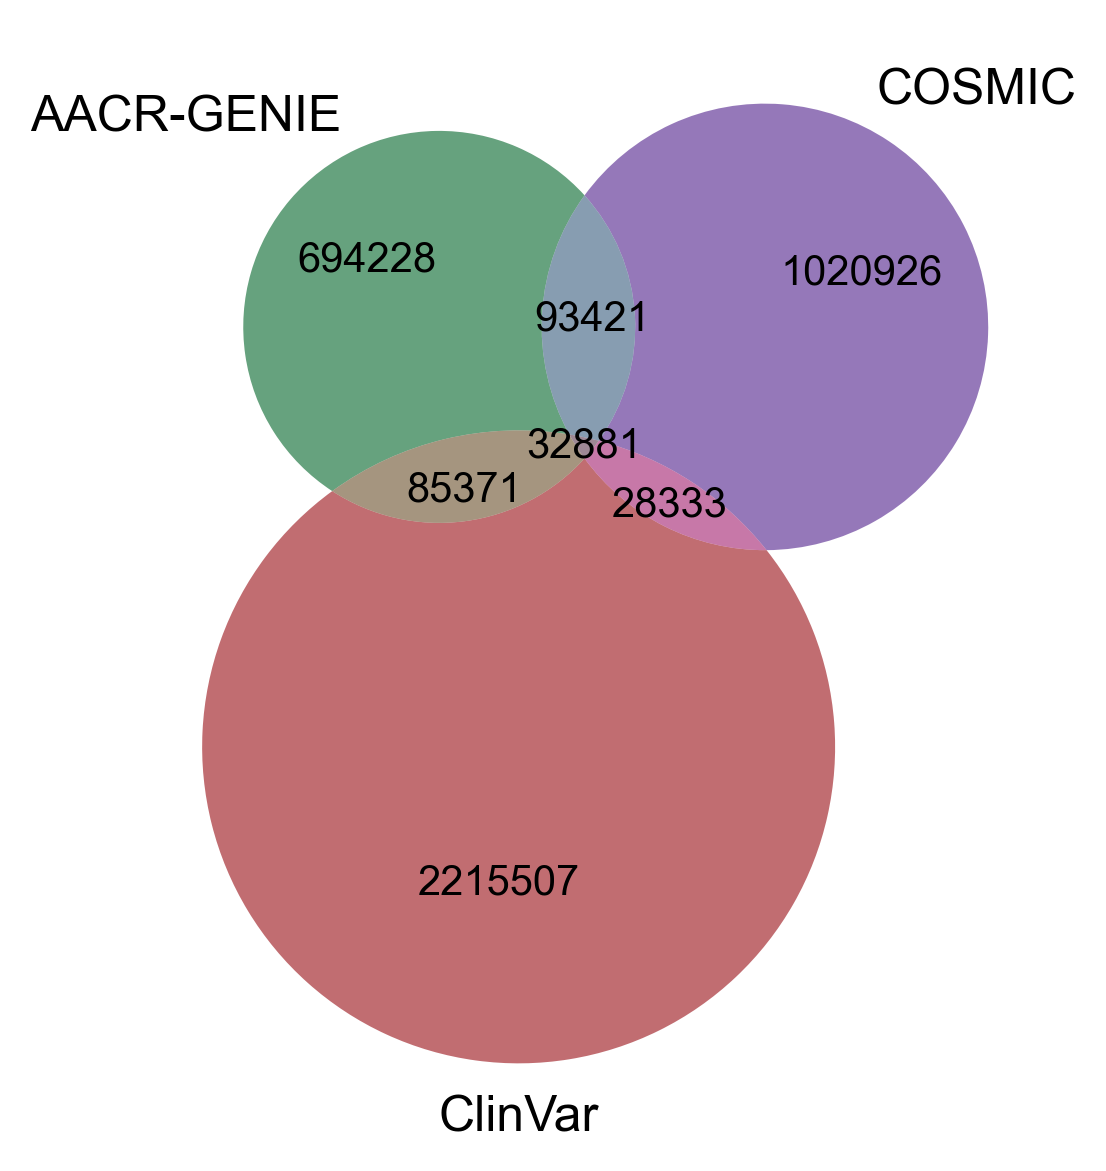

In [ ]:
from matplotlib_venn import venn3
fig, ax = plt.subplots(dpi=300)
venn3(subsets = (694228, 1020926, 93421, 2215507, 85371,28333,32881) , set_labels=('AACR-GENIE', 'COSMIC','ClinVar'), set_colors=(plt.cm.Greens(0.9), plt.cm.Purples(.9), plt.cm.Reds(.9)), alpha = 0.6)

plt.savefig('/Users/gorkordkx/Documents/Output/h2m/venn_3.svg', bbox_inches='tight')
plt.show()

In [ ]:
df_all['gene_name_h'].value_counts()

ATM       1067
TP53      1030
APC        997
NF1        977
BRCA2      757
          ... 
PSIP1        1
MUC1         1
KNSTRN       1
NFKBIE       1
ATF1         1
Name: gene_name_h, Length: 466, dtype: int64

In [ ]:
df_all.to_csv('.../Output/h2m/overlap_input.csv', index=False)

In [ ]:
df_all

,gene_name_h,start_h,end_h,ref_seq_h,alt_seq_h,type_h
0,CDK4,58145099,58145099,C,T,SNP
1,CDK4,58142322,58142322,C,T,SNP
2,CDK4,58145437,58145437,T,G,SNP
3,CDK4,58143020,58143020,C,T,SNP
4,CDK4,58143065,58143065,C,T,SNP
...,...,...,...,...,...,...
32876,KIAA1549,138602177,138602177,G,A,SNP
32877,KIAA1549,138552845,138552845,C,T,SNP
32878,KIAA1549,138602291,138602291,G,A,SNP
32879,KIAA1549,138602901,138602901,C,T,SNP


In [ ]:
df = pd.DataFrame(df_all['gene_name_h'].value_counts()).reset_index(drop=False)
names = df['index'][:10][::-1]
counts = df['gene_name_h'][:10][::-1]
y = [i * 0.9 for i in range(len(names))]
from matplotlib import lines
from matplotlib import patches
from matplotlib.patheffects import withStroke

In [ ]:
# The colors
BLUE = "#076fa2"

fig, ax = plt.subplots(figsize=(9, 6), dpi = 300)
ax.barh(y, counts, height=0.55, align="edge", color=BLUE);
ax.xaxis.set_ticks([i * 200 for i in range(0, 6)])
ax.xaxis.set_ticklabels([i * 200 for i in range(0, 6)], size=18, fontfamily="Arial", fontweight=100)
ax.xaxis.set_tick_params(labelbottom=False, labeltop=True, length=0)

ax.set_ylim((0, len(names) * 0.9 - 0.2))

ax.set_axisbelow(True)
ax.grid(axis = "x", color="#A8BAC4", lw=1.2)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["left"].set_lw(1.5)
ax.spines["left"].set_capstyle("butt")
PAD = 0.3
x = 0
color = "white"
path_effects = None
for name, count, y_pos in zip(names, counts, y):
    ax.text(
            x + PAD, y_pos + 0.5 / 2, name, 
            color=color, fontsize=18, va="center",
            path_effects=path_effects
        ) 
ax.yaxis.set_visible(False)

plt.savefig('.../Output/h2m/overlap_counts.svg', bbox_inches='tight')
plt.show()

# 2. Run H2M  
See ./2_run_h2m_murine_mutation_database.  

# 3. Process result data  
## (1) Combine left over inputs  

In [10]:
left_over_path = '/Users/kexindong/Documents/GitHub/Output/h2m_database/database-output-final/left_over_round_2/'
list_of_left_over = []
for name in range(1,17):
    path = f'{left_over_path}/h2m_db_left_over_{name}_r2.csv'
    list_of_left_over.append(pd.read_csv(path))
df_left_over = pd.concat(list_of_left_over).sort_values(by='index').reset_index(drop=True)
df_left_over = df_left_over.rename(columns={'index':'ID'})
df_left_over['database'] = [x.split('-')[0] for x in df_left_over['ID']]
df_left_over.to_csv('/Users/kexindong/Documents/GitHub/Output/h2m_database/database-output-final/left_over.csv',index=False)
del df_left_over

## (2) Combine results  

In [23]:
def label_numbers(numbers):
    last_number = None
    count = 0
    labeled_numbers = []

    for num in numbers:
        if num == last_number:
            count += 1
        else:
            count = 1
        last_number = num
        labeled_numbers.append(count)

    return labeled_numbers

def get_label_variant(h,x):
    return f"{h}-V{x:02}"

In [ ]:
# bind result 8
path_8 = '/Users/kexindong/Documents/GitHub/Output/h2m_database/database-output-final/result_round_1/h2m_db_result_8_'
list_8 = []
for name in [1,3,4,5,6,7,8,9,10,11,13]:
    path = f'{path_8}{name}.csv'
    list_8.append(pd.read_csv(path))
df_result_8 = pd.concat(list_8).sort_values(by='index').reset_index(drop=True)
df_result_8.to_csv('/Users/kexindong/Documents/GitHub/Output/h2m_database/database-output-final/result_round_1/h2m_db_result_8.csv',index=False)

In [39]:
path = '/Users/kexindong/Documents/GitHub/Output/h2m_database/database-output-final/result_round_1/h2m_db_result_'
# bind result 1-16 round 1 
path = '/Users/kexindong/Documents/GitHub/Output/h2m_database/database-output-final/result_round_1/h2m_db_result_'
list_of_result = []
for name in range(1,17):
    path_of_result = f'{path}{name}.csv'
    list_of_result.append(pd.read_csv(path_of_result))
df_result = pd.concat(list_of_result).sort_values(by='index').reset_index(drop=True)

In [44]:
# bind result 1-16 round 2
path = '/Users/kexindong/Documents/GitHub/Output/h2m_database/database-output-final/result_round_2/h2m_db_result_'
list_of_result = []
for name in range(1,17):
    path_of_result = f'{path}{name}_r2.csv'
    list_of_result.append(pd.read_csv(path_of_result))
df_result_r2 = pd.concat(list_of_result).sort_values(by='index').reset_index(drop=True)

In [46]:
df_result_all = pd.concat([df_result, df_result_r2]).sort_values(by='index').reset_index(drop=True)

In [50]:
df_result_all.to_csv('/Users/kexindong/Documents/GitHub/Output/h2m_database/database-output-final/df_result_raw.csv',index=False)

### - Result data cleaning  

In [51]:
numbers = label_numbers(df_result_all['index'])
df_result_all['ID_mouse'] = [get_label_variant(h,x) for h,x in zip(df_result_all['index'], numbers)]
df_binded = df_result_all.rename(columns={'index':'ID_human'})

In [52]:
df_binded = df_binded.sort_values(by='ID_mouse').reset_index(drop=True)

In [54]:
df_binded['ref_seq_h'] = df_binded['ref_seq_h'].fillna('-')
df_binded['alt_seq_h'] = df_binded['alt_seq_h'].fillna('-')

In [56]:
df_binded['Database'] = [x.split('-')[0] for x in df_binded['ID_mouse']]

In [57]:
df_binded.columns

Index(['gene_name_h', 'gene_id_h', 'tx_id_h', 'chr_h', 'exon_num_h',
       'strand_h', 'match', 'start_h', 'end_h', 'ref_seq_h', 'alt_seq_h',
       'HGVSc_h', 'HGVSp_h', 'classification_h', 'exon_h', 'type_h', 'status',
       'class', 'statement', 'flank_size_left', 'flank_size_right',
       'gene_name_m', 'gene_id_m', 'tx_id_m', 'chr_m', 'exon_num_m',
       'strand_m', 'type_m', 'classification_m', 'exon_m', 'start_m_ori',
       'end_m_ori', 'ref_seq_m_ori', 'alt_seq_m_ori', 'HGVSc_m_ori',
       'HGVSp_m_ori', 'start_m', 'end_m', 'ref_seq_m', 'alt_seq_m', 'HGVSc_m',
       'HGVSp_m', 'ID_human', 'ID_mouse', 'Database'],
      dtype='object')

In [60]:
# remove non-modelable mouse IDs
import numpy as np
df_binded.loc[df_binded['status'] == False, 'ID_mouse'] = np.nan

In [61]:
# remove M01 in the human ID column 
df_binded['ID_human'] = [x[:-4] for x in df_binded['ID_human']]

### - Add original database ID  

In [62]:
import json
path = '/Users/kexindong/Documents/GitHub/Output/h2m_database/'
# later
with open(f'{path}dict_ori_id.json', 'r') as file:
    dict_clinvar = json.load(file)

In [153]:
#### DONOT NEED TO RUN
path = '/Users/kexindong/Documents/GitHub/Output/h2m_database/'
name_1 = 'clinvar_input.csv'
name_2 = 'cosmic_input.csv'
clinvar = pd.read_csv(f'{path}{name_1}')
clinvar['index'] = [x[:-4] for x in clinvar['index']]
dict_clinvar = dict(zip(clinvar['index'],clinvar['clinvar_id']))
clinvar[clinvar['Variation_ID']==337847]
del clinvar
cosmic = pd.read_csv(f'{path}{name_2}')
cosmic['index'] = [x[:-4] for x in cosmic['index'] ]
dict_clinvar.update(dict(zip(cosmic['index'],cosmic['cosmic_ID'])))
del cosmic
with open(f'{path}dict_ori_id.json', 'w') as file:
    json.dump(dict_clinvar, file)

In [65]:
df_binded['ID_db'] =[ dict_clinvar.get(x,np.nan) for x in df_binded['ID_human']]

In [67]:
df_binded

,gene_name_h,gene_id_h,tx_id_h,chr_h,exon_num_h,strand_h,match,start_h,end_h,ref_seq_h,...,start_m,end_m,ref_seq_m,alt_seq_m,HGVSc_m,HGVSp_m,ID_human,ID_mouse,Database,ID_db
0,KRAS,ENSG00000133703.7,ENST00000256078.4,chr12,4,-,True,25398284,25398284,C,...,145192497.0,145192497.0,C,T,ENSMUST00000111710.8:c.35G>A,G12D,AACR-H0000001,AACR-H0000001-M01-V01,AACR,NaN
1,KRAS,ENSG00000133703.7,ENST00000256078.4,chr12,4,-,True,25398284,25398284,C,...,145192497.0,145192497.0,C,A,ENSMUST00000111710.8:c.35G>T,G12V,AACR-H0000002,AACR-H0000002-M01-V01,AACR,NaN
2,BRAF,ENSG00000157764.8,ENST00000288602.6,chr7,18,-,True,140453136,140453136,A,...,39604717.0,39604717.0,A,T,ENSMUST00000002487.15:c.1910T>A,V637E,AACR-H0000003,AACR-H0000003-M01-V01,AACR,NaN
3,PIK3CA,ENSG00000121879.3,ENST00000263967.3,chr3,20,+,True,178936091,178936091,G,...,32502197.0,32502197.0,G,A,ENSMUST00000029201.14:c.1633G>A,E545K,AACR-H0000004,AACR-H0000004-M01-V01,AACR,NaN
4,PIK3CA,ENSG00000121879.3,ENST00000263967.3,chr3,20,+,True,178952085,178952085,A,...,32516913.0,32516913.0,A,G,ENSMUST00000029201.14:c.3140A>G,H1047R,AACR-H0000005,AACR-H0000005-M01-V01,AACR,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4564993,LYN,ENSG00000254087.3,ENST00000519728.1,chr8,12,+,True,56912024,56912024,G,...,3783020.0,3783020.0,G,C,ENSMUST00000041377.13:c.1252G>C,G418R,COSMIC-H1771600,COSMIC-H1771600-M01-V01,COSMIC,76559154.0
4564994,LYN,ENSG00000254087.3,ENST00000519728.1,chr8,12,+,True,56912024,56912024,G,...,3783020.0,3783022.0,GGC,AGG,ENSMUST00000041377.13:c.1252_1254GGC>AGG,G418R,COSMIC-H1771600,COSMIC-H1771600-M01-V02,COSMIC,76559154.0
4564995,LYN,ENSG00000254087.3,ENST00000519728.1,chr8,12,+,True,56912024,56912024,G,...,3783020.0,3783022.0,GGC,CGG,ENSMUST00000041377.13:c.1252_1254GGC>CGG,G418R,COSMIC-H1771600,COSMIC-H1771600-M01-V03,COSMIC,76559154.0
4564996,LYN,ENSG00000254087.3,ENST00000519728.1,chr8,12,+,True,56912024,56912024,G,...,3783020.0,3783022.0,GGC,CGT,ENSMUST00000041377.13:c.1252_1254GGC>CGT,G418R,COSMIC-H1771600,COSMIC-H1771600-M01-V04,COSMIC,76559154.0


In [69]:
df_binded = df_binded[df_binded['class']!=5].reset_index(drop=True)

In [70]:
df_binded.to_csv('/Users/kexindong/Documents/GitHub/Output/h2m_database/database-output-final/df_result_cleaned.csv',index=False)

In [4]:
df_binded = pd.read_csv('/Users/kexindong/Documents/GitHub/Output/h2m_database/database-output-final/df_result_cleaned.csv')

# 4. Generate genome editing library design input  

- human prime editing

In [ ]:
path_h_anno, path_m_anno = '/Users/kexindong/Documents/GitHub/Database/Genecode/gencode_v19_GRCh37.db', '/Users/kexindong/Documents/GitHub/Database/Genecode/gencode_vm33_GRCm39.db'
# remember to replace the paths with yours
db_h = h2m.anno_loader(path_h_anno)

In [56]:
df = pd.read_csv('/Users/kexindong/Documents/GitHub/Output/h2m_database/aacr_input.csv')
list_of_id = list(df[df['count']>20]['index'].unique())
list_of_id = [x[:-4] for x in list_of_id]
df_pe = df_binded[df_binded['ID_human'].isin(list_of_id)].drop_duplicates().reset_index(drop=True)
df_pe.to_csv('/Users/kexindong/Documents/GitHub/Output/h2m_database/PEGG/subset_human.csv')
df_pe_h = df_pe[['gene_name_h','tx_id_h','start_h','end_h','ref_seq_h','alt_seq_h','type_h','ID_human','chr_h']]
df_pe_h.columns = ['Hugo_Symbol','tx_id_h','Start_Position','End_Position', 'Reference_Allele','Tumor_Seq_Allele2','Variant_Type','ID','Chromosome']
df_pe_h
df_pe_h['Chromosome'] = [x[3:] for x in df_pe_h['Chromosome']].copy()
df_pe_h.to_csv('/Users/kexindong/Documents/GitHub/Output/h2m_database/PEGG/pe_human.csv', index=False)

/var/folders/rl/65f1zcd575n092yn3xlqlqfw0000gn/T/ipykernel_17689/2865124907.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pe_h['Chromosome'] = [x[3:] for x in df_pe_h['Chromosome']].copy()


- human base editing  

In [57]:
def be_amenable(df):
    set_be = {('C','T'),
              ('T','C'),
              ('A','G'),
              ('G','A'),}
    df = df[df['Variant_Type']=='SNP'].reset_index(drop=True)
    df = df[[(x,y) in set(set_be) for x,y in zip(df['Reference_Allele'],df['Tumor_Seq_Allele2'])]].reset_index(drop=True)
    return df

In [58]:
be_amenable(df_pe_h).to_csv('/Users/kexindong/Documents/GitHub/Output/h2m_database/BEGG/be_human.csv', index=False)

- mouse prime editing  

In [59]:
df_pe_m = df_binded[df_binded['ID_human'].isin(list_of_id)].reset_index(drop=True)
df_pe_m = df_pe_m[df_pe_m['status']==True].reset_index(drop=True)
df_pe_m = df_pe_m[['gene_name_m','tx_id_m','start_m','end_m','ref_seq_m','alt_seq_m','type_m','ID_mouse','chr_m']]
df_pe_m = df_pe_m.rename(columns={'ID_mouse':'ID'})
df_pe_m['chr_m'] = [x[3:] for x in df_pe_m['chr_m']]
df_pe_m.columns =['Hugo_Symbol','tx_id_m','Start_Position','End_Position','Reference_Allele','Tumor_Seq_Allele2','Variant_Type','ID','Chromosome']
df_pe_m

,Hugo_Symbol,tx_id_m,Start_Position,End_Position,Reference_Allele,Tumor_Seq_Allele2,Variant_Type,ID,Chromosome
0,Kras,ENSMUST00000111710.8,145192497.0,145192497.0,C,T,SNP,AACR-H0000001-M01-V01,6
1,Kras,ENSMUST00000111710.8,145192497.0,145192497.0,C,A,SNP,AACR-H0000002-M01-V01,6
2,Braf,ENSMUST00000002487.15,39604717.0,39604717.0,A,T,SNP,AACR-H0000003-M01-V01,6
3,Pik3ca,ENSMUST00000029201.14,32502197.0,32502197.0,G,A,SNP,AACR-H0000004-M01-V01,3
4,Pik3ca,ENSMUST00000029201.14,32516913.0,32516913.0,A,G,SNP,AACR-H0000005-M01-V01,3
...,...,...,...,...,...,...,...,...,...
4704,Ntrk2,ENSMUST00000079828.7,59022231.0,59022231.0,C,T,SNP,AACR-H0005026-M01-V01,13
4705,Egfr,ENSMUST00000020329.13,16810181.0,16810181.0,C,T,SNP,AACR-H0005027-M01-V01,11
4706,Xpo1,ENSMUST00000102869.8,23235114.0,23235114.0,A,G,SNP,AACR-H0005028-M01-V01,11
4707,Ep300,ENSMUST00000068387.11,81525575.0,81525576.0,-,A,INS,AACR-H0005029-M01-V01,15


In [60]:
df_pe_m.to_csv('/Users/kexindong/Documents/GitHub/Output/h2m_database/PEGG/pe_mouse.csv', index=False)

- mouse base editing  

In [61]:
be_amenable(df_pe_m).to_csv('/Users/kexindong/Documents/GitHub/Output/h2m_database/BEGG/be_mouse.csv', index=False)

## (3) Run PEGG and BEGG  

In [2]:
from pegg import prime
from pegg import base
import pandas as pd

/Users/kexindong/Documents/GitHub/h2m-public/.conda/lib/python3.10/site-packages/Bio/pairwise2.py:278: BiopythonDeprecationWarning: Bio.pairwise2 has been deprecated, and we intend to remove it in a future release of Biopython. As an alternative, please consider using Bio.Align.PairwiseAligner as a replacement, and contact the Biopython developers if you still need the Bio.pairwise2 module.
  warnings.warn(


In [21]:
list_of_gene = list(df['tx_id_h'].unique())
list_chr = []
for x in list_of_gene:
    try:
        chr = str(db_h[x].chrom)[3:]
    except:
        chr = None
    list_chr.append(chr)
dict_of_chr = dict(zip(list_of_gene, list_chr))

In [187]:
path = '/Users/kexindong/Documents/GitHub/Output/h2m_database/sample_data/'
df = pd.read_csv(f'{path}db_1_sample_1000.csv')

In [44]:
path_h_ref, path_m_ref = '/Users/kexindong/Documents/GitHub/Database/RefGenome/ncbi-2023-09-12/GCF_000001405.25_GRCh37.p13_genomic.fna.gz', '/Users/kexindong/Documents/GitHub/Database/RefGenome/mouse-2023-09-13/GCF_000001635.27_GRCm39_genomic.fna.gz'
chrom_dict_h, i = prime.genome_loader(path_h_ref)
chrom_dict_m, i = prime.genome_loader(path_m_ref)

In [45]:
df.columns

Index(['gene_name_h', 'gene_id_h', 'tx_id_h', 'chr_h', 'exon_num_h',
       'strand_h', 'match', 'start_h', 'end_h', 'ref_seq_h', 'alt_seq_h',
       'HGVSc_h', 'HGVSp_h', 'classification_h', 'exon_h', 'type_h', 'status',
       'class', 'statement', 'flank_size_left', 'flank_size_right',
       'gene_name_m', 'gene_id_m', 'tx_id_m', 'chr_m', 'exon_num_m',
       'strand_m', 'type_m', 'classification_m', 'exon_m', 'start_m_ori',
       'end_m_ori', 'ref_seq_m_ori', 'alt_seq_m_ori', 'HGVSc_m_ori',
       'HGVSp_m_ori', 'start_m', 'end_m', 'ref_seq_m', 'alt_seq_m', 'HGVSc_m',
       'HGVSp_m', 'ID_human', 'ID_mouse', 'Database'],
      dtype='object')

In [189]:
df['chr_h'] = [x[3:] for x in df['chr_h']]
df['chr_m'] = [x[3:] for x in df['chr_m']]

In [190]:
df_h = df[[
    'gene_name_h','tx_id_h','start_h', 'end_h', 'ref_seq_h','alt_seq_h','type_h','ID_human',
       'chr_h'
]]

df_m = df[[
    'gene_name_m','tx_id_m','start_m', 'end_m', 'ref_seq_m','alt_seq_m','type_m','ID_mouse',
       'chr_m'
]]

In [191]:
df_h.columns = ['Hugo_Symbol','tx_id_h','Start_Position','End_Position', 'Reference_Allele','Tumor_Seq_Allele2','Variant_Type','ID','Chromosome']
df_m.columns = ['Hugo_Symbol','tx_id_h','Start_Position','End_Position', 'Reference_Allele','Tumor_Seq_Allele2','Variant_Type','ID','Chromosome']

In [192]:
def be_amenable(df):
    set_be = {('C','T'),
              ('T','C'),
              ('A','G'),
              ('G','A'),}
    df = df[df['Variant_Type']=='SNP'].reset_index(drop=True)
    df = df[[(x,y) in set(set_be) for x,y in zip(df['Reference_Allele'],df['Tumor_Seq_Allele2'])]].reset_index(drop=True)
    return df

In [193]:
df_m = df_m.dropna(subset='ID').reset_index(drop=True)

In [194]:
df_m

,Hugo_Symbol,tx_id_h,Start_Position,End_Position,Reference_Allele,Tumor_Seq_Allele2,Variant_Type,ID,Chromosome
0,Bcl6,ENSMUST00000023151.6,23791861.0,23791861.0,C,A,SNP,AACR-H0000996-M01-V01,16
1,Esr1,ENSMUST00000105590.8,4662747.0,4662747.0,T,C,SNP,AACR-H0002687-M01-V01,10
2,Keap1,ENSMUST00000164812.8,21145012.0,21145012.0,C,A,SNP,AACR-H0002754-M01-V01,9
3,Mlh1,ENSMUST00000035079.10,111057546.0,111057546.0,T,C,SNP,AACR-H0014742-M01-V01,9
4,Tsc2,ENSMUST00000227745.2,24842559.0,24842559.0,G,A,SNP,AACR-H0017727-M01-V01,17
...,...,...,...,...,...,...,...,...,...
773,Atic,ENSMUST00000027384.6,71615930.0,71615930.0,A,G,SNP,COSMIC-H1601022-M01-V01,1
774,Atic,ENSMUST00000027384.6,71608130.0,71608130.0,G,A,SNP,COSMIC-H1601059-M01-V01,1
775,Atic,ENSMUST00000027384.6,71601743.0,71601743.0,A,C,SNP,COSMIC-H1603731-M01-V01,1
776,Prdm2,ENSMUST00000105778.8,142859478.0,142859478.0,T,C,SNP,COSMIC-H1677359-M01-V01,4


In [196]:
df_h = be_amenable(df_h)
df_m = be_amenable(df_m)

In [198]:
df_m['Reference_Allele'] = [str(x) for x in df_m['Reference_Allele']]
df_m['Tumor_Seq_Allele2'] = [str(x) for x in df_m['Tumor_Seq_Allele2']]
df_m['Start_Position'] = [int(x) for x in df_m['Start_Position']]
df_m['End_Position'] = [int(x) for x in df_m['End_Position']]
df_h['Reference_Allele'] = [str(x) for x in df_h['Reference_Allele']]
df_h['Tumor_Seq_Allele2'] = [str(x) for x in df_h['Tumor_Seq_Allele2']]
df_h['Start_Position'] = [int(x) for x in df_h['Start_Position']]
df_h['End_Position'] = [int(x) for x in df_h['End_Position']]
df_be_h = base.run_base(df_h, 'cBioPortal', chrom_dict_h, PAM='NGN',filtration='ABE+CBE', ideal_edit_window=[4, 8], auto_SNP_filter=True, proto_size=19,context_size=120, RE_sites=None, polyT_threshold=4, before_proto_context=5,sensor_length=40, sensor_orientation='reverse-complement', sensor=True)
df_be_m = base.run_base(df_m, 'cBioPortal', chrom_dict_m, PAM='NGN',filtration='ABE+CBE', ideal_edit_window=[4, 8], auto_SNP_filter=True, proto_size=19,context_size=120, RE_sites=None, polyT_threshold=4, before_proto_context=5,sensor_length=40, sensor_orientation='reverse-complement', sensor=True)

In [201]:
df_be = pd.concat([df_be_h, df_be_m])

In [233]:
df_be.to_csv(f'{path}db_2_be.csv', index=False)

PEGG

In [204]:
df_pe_input = pd.read_csv('/Users/kexindong/Documents/GitHub/Output/h2m_database/PEGG/pe_human.csv')

In [205]:
df_pegg = pd.read_csv('/Users/kexindong/Documents/GitHub/Output/h2m_database/PEGG/pe_human_result.csv')

In [213]:
list_of_pe_inluced_id = list(df_pe_input['ID'])

In [225]:
df_pegg_sub = df_pegg[df_pegg['ID']=='AACR-H0002687-M01'].reset_index(drop=True)

In [226]:
df_pegg_sub

,mutation_idx,Hugo_Symbol,tx_id_h,Start_Position,End_Position,Reference_Allele,Tumor_Seq_Allele2,Variant_Type,ID,Chromosome,...,indel_size,PEGG2_Score,RF_Score,pegRNA_rank,sensor_wt,sensor_alt,sensor_orientation,sensor_error,contains_polyT_terminator,pegRNA_id
0,41,ESR1,ENSMUST00000105590.8,152129399,152129399,T,C,SNP,AACR-H0002687-M01,6,...,0,23.348941,37.452766,1.0,GGGCACCTGCTGGCCGTGGGGCTGCAGGAAAGGCGACAGCTGCGGC...,GGGCACCTGCTGGCCGTGGGGCTGCAGGAAAGGCGGCAGCTGCGGC...,reverse-complement,No Error,False,pegRNA_205
1,41,ESR1,ENSMUST00000105590.8,152129399,152129399,T,C,SNP,AACR-H0002687-M01,6,...,0,23.112691,36.314398,2.0,GGGCACCTGCTGGCCGTGGGGCTGCAGGAAAGGCGACAGCTGCGGC...,GGGCACCTGCTGGCCGTGGGGCTGCAGGAAAGGCGGCAGCTGCGGC...,reverse-complement,No Error,False,pegRNA_206
2,41,ESR1,ENSMUST00000105590.8,152129399,152129399,T,C,SNP,AACR-H0002687-M01,6,...,0,22.681445,36.314398,3.0,GGGCACCTGCTGGCCGTGGGGCTGCAGGAAAGGCGACAGCTGCGGC...,GGGCACCTGCTGGCCGTGGGGCTGCAGGAAAGGCGGCAGCTGCGGC...,reverse-complement,No Error,False,pegRNA_207
3,41,ESR1,ENSMUST00000105590.8,152129399,152129399,T,C,SNP,AACR-H0002687-M01,6,...,0,23.632858,36.145389,4.0,GGGCACCTGCTGGCCGTGGGGCTGCAGGAAAGGCGACAGCTGCGGC...,GGGCACCTGCTGGCCGTGGGGCTGCAGGAAAGGCGGCAGCTGCGGC...,reverse-complement,No Error,False,pegRNA_208
4,41,ESR1,ENSMUST00000105590.8,152129399,152129399,T,C,SNP,AACR-H0002687-M01,6,...,0,22.780257,33.087854,5.0,GGGCACCTGCTGGCCGTGGGGCTGCAGGAAAGGCGACAGCTGCGGC...,GGGCACCTGCTGGCCGTGGGGCTGCAGGAAAGGCGGCAGCTGCGGC...,reverse-complement,No Error,False,pegRNA_209


In [228]:
df_m = df_m[[x[:-4] in list_of_pe_inluced_id for x in df_m['ID']]]

In [229]:
df_pe_m = prime.run(df_m, 'cBioPortal', chrom_dict=chrom_dict_m, PAM='NGN',rankby='RF_Score', pegRNAs_per_mut=5, RTT_lengths=[5, 10, 15, 25, 30],PBS_lengths=[8, 10, 13, 15], min_RHA_size=1, RE_sites=None, polyT_threshold=4,proto_size=19, context_size=120, before_proto_context=5, sensor_length=60,sensor_orientation='reverse-complement', sensor=True)
df_pe_m

,mutation_idx,Hugo_Symbol,tx_id_h,Start_Position,End_Position,Reference_Allele,Tumor_Seq_Allele2,Variant_Type,ID,Chromosome,...,indel_size,PEGG2_Score,RF_Score,pegRNA_rank,sensor_wt,sensor_alt,sensor_orientation,sensor_error,contains_polyT_terminator,pegRNA_id
0,0,Esr1,ENSMUST00000105590.8,4662747,4662747,T,C,SNP,AACR-H0002687-M01-V01,10,...,0,18.882586,27.552490,1.0,CGCTGATGCTGCTGCACCCGCCGCCGCAGCTGTCTCCTTTCCTGCA...,CGCTGATGCTGCTGCACCCGCCGCCGCAGCTGCCTCCTTTCCTGCA...,reverse-complement,No Error,False,pegRNA_0
1,0,Esr1,ENSMUST00000105590.8,4662747,4662747,T,C,SNP,AACR-H0002687-M01-V01,10,...,0,22.159396,27.281115,2.0,AGCCCGCTGATGCTGCTGCACCCGCCGCCGCAGCTGTCTCCTTTCC...,AGCCCGCTGATGCTGCTGCACCCGCCGCCGCAGCTGCCTCCTTTCC...,reverse-complement,No Error,False,pegRNA_1
2,0,Esr1,ENSMUST00000105590.8,4662747,4662747,T,C,SNP,AACR-H0002687-M01-V01,10,...,0,22.371025,27.281115,3.0,AGCCCGCTGATGCTGCTGCACCCGCCGCCGCAGCTGTCTCCTTTCC...,AGCCCGCTGATGCTGCTGCACCCGCCGCCGCAGCTGCCTCCTTTCC...,reverse-complement,No Error,False,pegRNA_2
3,0,Esr1,ENSMUST00000105590.8,4662747,4662747,T,C,SNP,AACR-H0002687-M01-V01,10,...,0,18.820443,27.081155,4.0,CGCTGATGCTGCTGCACCCGCCGCCGCAGCTGTCTCCTTTCCTGCA...,CGCTGATGCTGCTGCACCCGCCGCCGCAGCTGCCTCCTTTCCTGCA...,reverse-complement,No Error,False,pegRNA_3
4,0,Esr1,ENSMUST00000105590.8,4662747,4662747,T,C,SNP,AACR-H0002687-M01-V01,10,...,0,23.026340,23.273683,5.0,AGCCCGCTGATGCTGCTGCACCCGCCGCCGCAGCTGTCTCCTTTCC...,AGCCCGCTGATGCTGCTGCACCCGCCGCCGCAGCTGCCTCCTTTCC...,reverse-complement,No Error,False,pegRNA_4


In [231]:
df = pd.concat([df_pegg_sub, df_pe_m])

# 5. Result Statistics  

### (1) Model-able Statistics  

In [83]:
df_aacr = pd.read_csv('/Users/gorkordkx/Documents/Output/h2m/1_murine_mutation_database_output/aacr_output/aacr_result_f0.csv')
df_cosmic = pd.read_csv('/Users/gorkordkx/Documents/Output/h2m/1_murine_mutation_database_output/cosmic_output/cosmic_result_f0.csv')
df_clinvar = pd.read_csv('/Users/gorkordkx/Documents/Output/h2m/1_murine_mutation_database_output/clinvar_output/clinvar_result_f0.csv')

In [84]:
name_list = ['aacr','cosmic','clinvar']
df_list = [df_aacr, df_cosmic, df_clinvar]

for x in [0,1,2]:
    l_1 = len(df_list[x]['index'].unique())
    df_sub = df_list[x][df_list[x]['status']==True]
    l_2 = len(df_sub['index'].unique())
    print(f'{name_list[x]}: {l_2} out of {l_1} ({l_2/l_1* 100:.2f}%) mutations can be modeled.\n')

aacr: 683645 out of 799660 (85.49%) mutations can be modeled.

cosmic: 473858 out of 598809 (79.13%) mutations can be modeled.

clinvar: 1585810 out of 2021074 (78.46%) mutations can be modeled.



In [125]:
799660+598809+2021074

0.8340348780487805

In [63]:
df_binded[(df_binded['gene_name_h']=='EGFR') & (df_binded['HGVSp_h']=='G719S')]

,gene_name_h,gene_id_h,tx_id_h,chr_h,exon_num_h,strand_h,match,start_h,end_h,ref_seq_h,...,start_m,end_m,ref_seq_m,alt_seq_m,HGVSc_m,HGVSp_m,ID_human,ID_mouse,Database,ID_db
1127,EGFR,ENSG00000146648.11,ENST00000275493.2,chr7,28,+,True,55241707,55241707,G,...,16841271.0,16841271.0,G,A,ENSMUST00000020329.13:c.2161G>A,G721S,AACR-H0001067,AACR-H0001067-M01-V01,AACR,NaN
137860,EGFR,ENSG00000146648.11,ENST00000275493.2,chr7,28,+,True,55241707,55241708,GG,...,16841271.0,16841272.0,GG,TC,ENSMUST00000020329.13:c.2161_2162GG>TC,G721S,AACR-H0125830,AACR-H0125830-M01-V01,AACR,NaN
619908,EGFR,ENSG00000146648.11,ENST00000275493.2,chr7,28,+,True,55241706,55241707,GG,...,16841270.0,16841271.0,GG,AA,ENSMUST00000020329.13:c.2160_2161GG>AA,G721S,AACR-H0574620,AACR-H0574620-M01-V01,AACR,NaN
1762934,EGFR,ENSG00000146648.11,ENST00000275493.2,chr7,28,+,True,55241707,55241707,G,...,16841271.0,16841271.0,G,A,ENSMUST00000020329.13:c.2161G>A,G721S,CLINVAR-H0893912,CLINVAR-H0893912-M01-V01,CLINVAR,16612.0
3847616,EGFR,ENSG00000146648.11,ENST00000275493.2,chr7,28,+,True,55241707,55241707,G,...,16841271.0,16841271.0,G,A,ENSMUST00000020329.13:c.2161G>A,G721S,COSMIC-H0900805,COSMIC-H0900805-M01-V01,COSMIC,24005626.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3863169,EGFR,ENSG00000146648.11,ENST00000275493.2,chr7,28,+,True,55241707,55241707,G,...,16841271.0,16841271.0,G,A,ENSMUST00000020329.13:c.2161G>A,G721S,COSMIC-H0928414,COSMIC-H0928414-M01-V01,COSMIC,24005626.0
3863424,EGFR,ENSG00000146648.11,ENST00000275493.2,chr7,28,+,True,55241707,55241707,G,...,16841271.0,16841271.0,G,A,ENSMUST00000020329.13:c.2161G>A,G721S,COSMIC-H0928775,COSMIC-H0928775-M01-V01,COSMIC,24005626.0
3863812,EGFR,ENSG00000146648.11,ENST00000275493.2,chr7,28,+,True,55241707,55241707,G,...,16841271.0,16841271.0,G,A,ENSMUST00000020329.13:c.2161G>A,G721S,COSMIC-H0929331,COSMIC-H0929331-M01-V01,COSMIC,24005626.0
3863819,EGFR,ENSG00000146648.11,ENST00000275493.2,chr7,28,+,True,55241707,55241707,G,...,16841271.0,16841271.0,G,A,ENSMUST00000020329.13:c.2161G>A,G721S,COSMIC-H0929342,COSMIC-H0929342-M01-V01,COSMIC,24005626.0


In [86]:
683645+473858+1585810

2743313

In [12]:
df_aacr['statement'].value_counts()

Class 0: This mutation can be originally modeled.                                   566996
Class 4: Flanked segments are not identical.                                        117841
Class 2: This mutation can be modeled, but the effect may not be consistent.         97055
Class 1: This mutation can be alternatively modeled.                                 93736
Class 3: This mutation cannot be originally modeled and no alternative is found.       745
Class 5: Coordinate error. This mutation is not in the query gene.                       2
Name: statement, dtype: int64

In [ ]:
df_aacr = pd.read_csv('.../aacr_output/aacr_result_f0.csv')
df_cosmic = pd.read_csv('.../cosmic_output/cosmic_result_f0.csv')
df_clinvar = pd.read_csv('.../clinvar_output/clinvar_result_f0.csv')

In [16]:
df_binded = pd.read_csv('/Users/kexindong/Documents/GitHub/Output/h2m_database/database-output-final/df_result_cleaned.csv')

In [20]:
len(df_binded['ID_mouse'].unique())

3682634

In [46]:
df_binded[df_binded['flank_size']==1959]['gene_name_h'].value_counts()

gene_name_h
PRPF8    1227
Name: count, dtype: int64

In [21]:
df_binded['flank_size_left'] = df_binded['flank_size_left'].fillna('0aa')
df_binded['flank_size_right'] = df_binded['flank_size_right'].fillna('0aa')
df_binded['flank_size'] = [int(x[:-2])+int(y[:-2]) for x,y in zip(df_binded['flank_size_left'], df_binded['flank_size_right'])]

In [48]:
len(df_binded[df_binded['flank_size']>0])

3345179

In [47]:
len(df_binded[df_binded['flank_size']>20])

1785931

In [49]:
1785931/3345179

0.5338820433824318

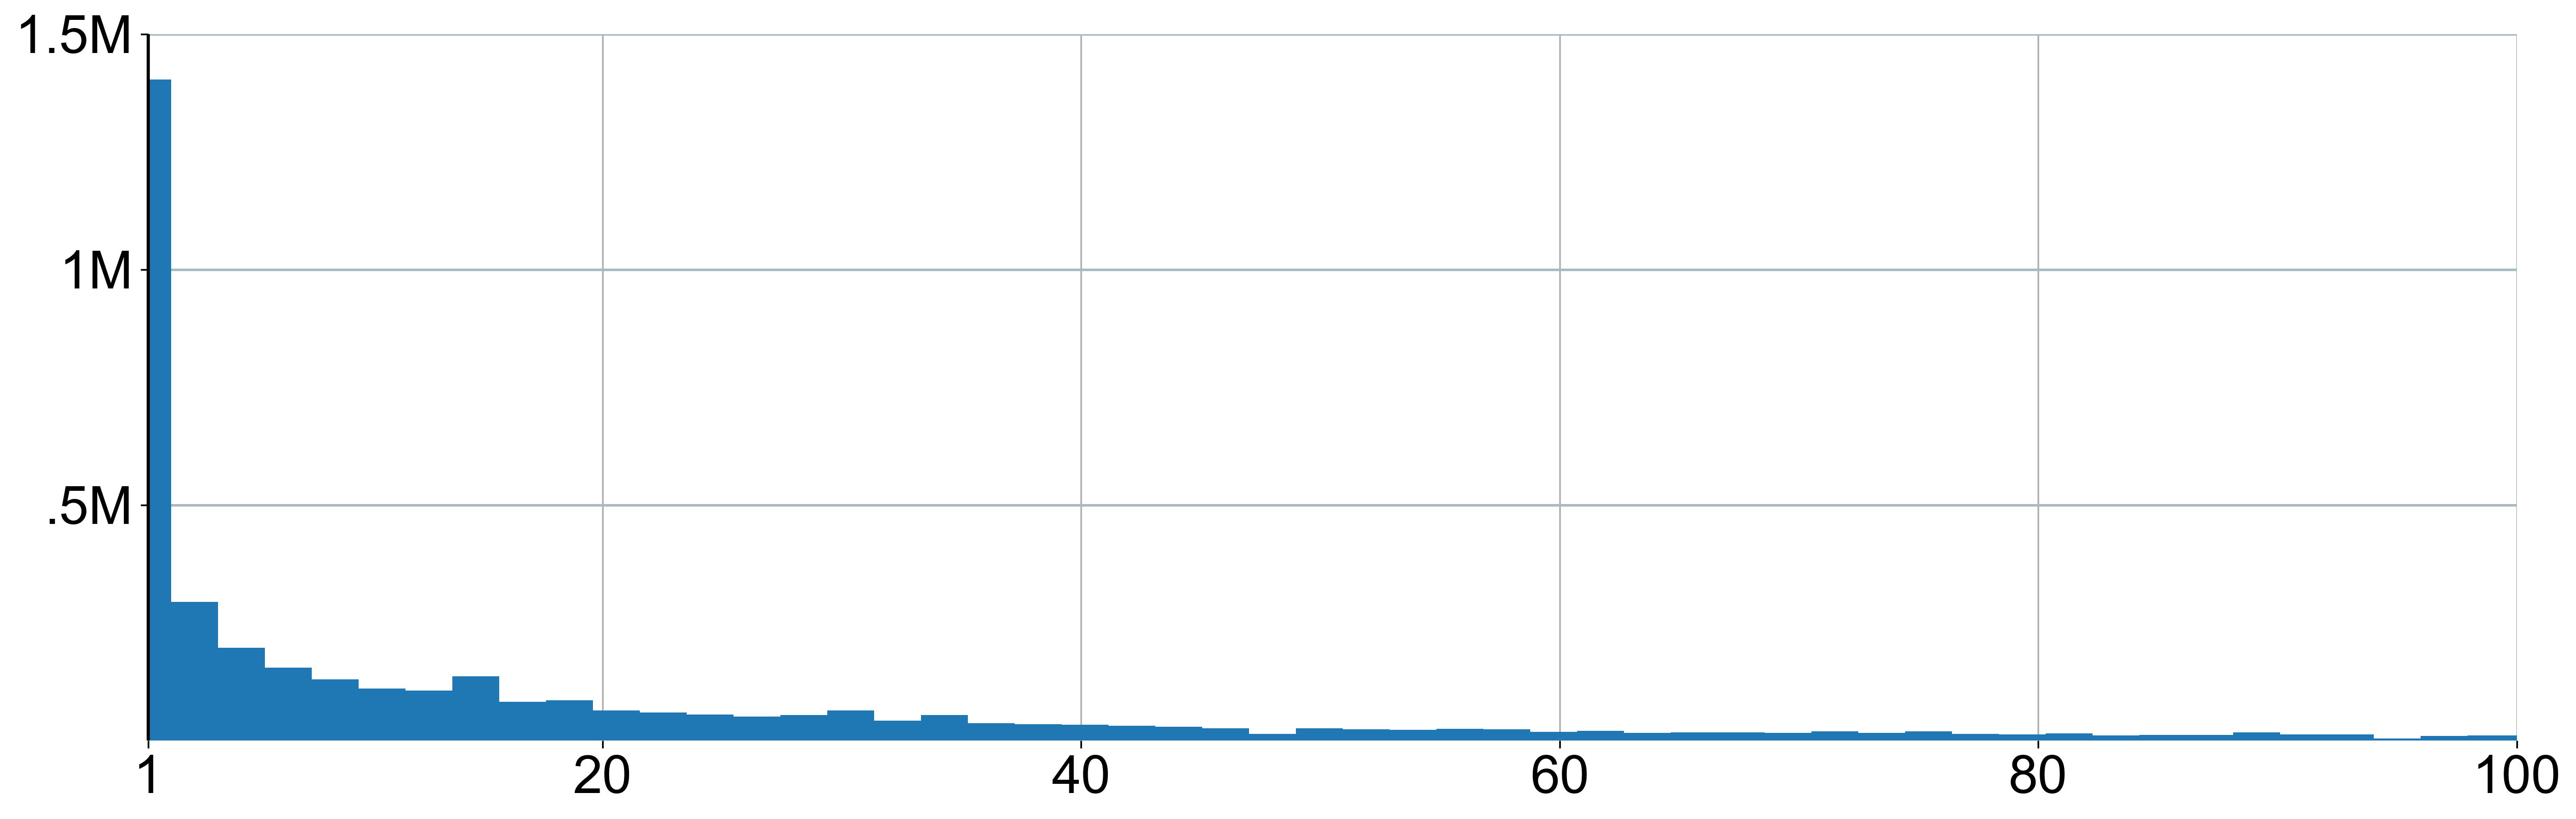

In [42]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(20,6), dpi = 300)
# Assuming df_binded is your DataFrame
df_binded['flank_size'].hist(bins=1000)
# Set the x-axis limit to show only 0 to 750
plt.xlim(1, 100)
ax.set_ylim((0,1))
ax.yaxis.set_ticks([x*10000 for x in [50,100,150]])
ax.yaxis.set_ticklabels(['.5M', '1M', '1.5M'], size=25, fontfamily="Arial", fontweight=100)
ax.xaxis.set_ticks([1,20,40,60,80,100])
ax.xaxis.set_ticklabels([1,20,40,60,80,100], size=25, fontfamily="Arial", fontweight=100)
# ax.yaxis.set_tick_params(labelbottom=False, labeltop=True, length=0)
ax.set_axisbelow(True)
ax.grid(axis = "y", color="#A8BAC4", lw=1.2)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["left"].set_lw(1.5)
ax.spines["left"].set_capstyle("butt")
plt.yticks(fontsize = 25)
# Display the plot
plt.savefig(f'/Users/kexindong/Documents/GitHub/Output/h2m_database/figures/database/hist_flank_size.svg', bbox_inches='tight')
plt.show()

In [ ]:
name_list = ['AACR','COSMIC','CLINVAR']
list_of_n = []
list_of_fs = []
list_of_input = []
list_of_output = []
list_of_class_0 = []
list_of_class_1 = []
list_of_class_2 = []
list_of_class_3 = []

for x in [0,1,2]:
    name = name_list[x]
    for fs in [1,5,11,21]:
        df = df_binded[df_binded['Database']==name].reset_index(drop=True)
        df = df[(df['flank_size'] >= fs) or (df['flank_size'] >= 0)] 
        list_of_n.append(name)
        list_of_fs.append(fs)
        l_1 = len(df['index'].unique())
        df_sub = df[df['status']==True]
        l_2 = len(df_sub['index'].unique())
        print(f'{name} with {fs}: {l_2} out of {l_1} ({l_2/l_1* 100:.2f}%) mutations can be modeled.\n')
        list_of_output.append(l_2)
        list_of_input.append(l_1)
        list_of_class_0.append(len(df[df['class']==0]['index'].unique()))
        list_of_class_1.append(len(df[df['class']==1]['index'].unique()))
        list_of_class_2.append(len(df[df['class']==2]['index'].unique()))
        list_of_class_3.append(len(df[df['class']==3]['index'].unique()))

In [52]:
name_list = ['AACR','COSMIC','CLINVAR']
list_of_n = []
list_of_fs = []
list_of_input = []
list_of_output = []
list_of_class_0 = []
list_of_class_1 = []
list_of_class_2 = []
list_of_class_3 = []

for x in [0,1,2]:
    name = name_list[x]
    df = df_binded[df_binded['Database']==name].reset_index(drop=True)
    l_1 = len(df['ID_human'].unique())
    for fs in [1,5,11,21]:
        df = df[df['flank_size'] >= fs] 
        list_of_n.append(name)
        list_of_fs.append(fs)
        df_sub = df[df['status']==True]
        l_2 = len(df_sub['ID_human'].unique())
        print(f'{name} with {fs}: {l_2} out of {l_1} ({l_2/l_1* 100:.2f}%) mutations can be modeled.\n')
        list_of_output.append(l_2)
        list_of_input.append(l_1)
        list_of_class_0.append(len(df[df['class']==0]['ID_human'].unique()))
        list_of_class_1.append(len(df[df['class']==1]['ID_human'].unique()))
        list_of_class_2.append(len(df[df['class']==2]['ID_human'].unique()))
        list_of_class_3.append(len(df[df['class']==3]['ID_human'].unique()))

AACR with 1: 656168 out of 803974 (81.62%) mutations can be modeled.

AACR with 5: 569309 out of 803974 (70.81%) mutations can be modeled.

AACR with 11: 491026 out of 803974 (61.07%) mutations can be modeled.

AACR with 21: 403953 out of 803974 (50.24%) mutations can be modeled.

COSMIC with 1: 834682 out of 1044671 (79.90%) mutations can be modeled.

COSMIC with 5: 707170 out of 1044671 (67.69%) mutations can be modeled.

COSMIC with 11: 639560 out of 1044671 (61.22%) mutations can be modeled.

COSMIC with 21: 507215 out of 1044671 (48.55%) mutations can be modeled.

CLINVAR with 1: 1506299 out of 2038473 (73.89%) mutations can be modeled.

CLINVAR with 5: 1198748 out of 2038473 (58.81%) mutations can be modeled.

CLINVAR with 11: 973006 out of 2038473 (47.73%) mutations can be modeled.

CLINVAR with 21: 742799 out of 2038473 (36.44%) mutations can be modeled.



In [68]:
df = pd.DataFrame(zip(list_of_n, list_of_fs,
list_of_input,
list_of_output,
list_of_class_0,
list_of_class_1,
list_of_class_2,
list_of_class_3))
df.columns = ['Database','Flank_Size','Num_Input','Num_Output','Class_0','Class_1','Class_2','Class_3']

In [69]:
df

,Database,Flank_Size,Num_Input,Num_Output,Class_0,Class_1,Class_2,Class_3
0,AACR,1,803974,656168,537651,31913,86915,0
1,AACR,5,803974,569309,478084,27402,63953,0
2,AACR,11,803974,491026,415992,23561,51537,0
3,AACR,21,803974,403953,344597,19107,40282,0
4,COSMIC,1,1044671,834682,692349,52114,90869,0
5,COSMIC,5,1044671,707170,639845,46937,20680,0
6,COSMIC,11,1044671,639560,587041,43216,9494,0
7,COSMIC,21,1044671,507215,466917,35535,4851,0
8,CLINVAR,1,2038473,1506299,1209054,71314,226858,0
9,CLINVAR,5,2038473,1198748,1034049,58723,106341,0


In [62]:
df.to_csv('/Users/kexindong/Documents/GitHub/Output/h2m_database/database-output-final/fs_stat',index=False)

#### Bar plots & Pie plots

In [126]:
df_stat

,Database,Total_Input,Input_Human_Mutations_With_Murine_Homo,Pre_predicted,Modeled_0
0,AACR-GENIE,851088,840139,799660,683645
1,COSMIC,1112815,1109699,598809,473858
2,ClinVar,2352598,2296170,2021074,1585810


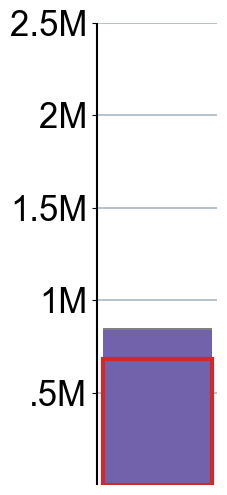

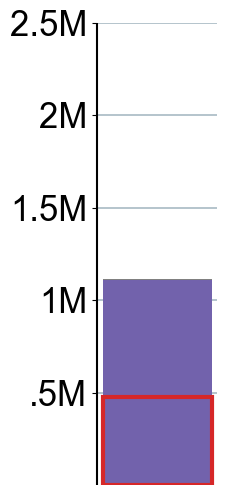

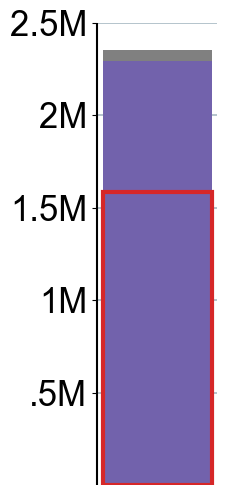

In [129]:
def drawBar(x1, y1, bottom, color):
    plt.bar(x1, y1, bottom=bottom, color=color, width = 0.2)
name = ['aacr','cosmic','clinvar']
for i,x in df_stat.iterrows():
    a,b,c,d = x[1:5]
    fig, ax = plt.subplots(figsize=(1.55,6))
    drawBar(0.3, b, 0, color = plt.cm.Purples(0.7))
    drawBar(0.3, a-b, b, color = 'grey')
    plt.bar(0.3, d, color=plt.cm.Purples(0.7), width = 0.2, edgecolor = 'tab:red', linewidth=3)
    ax.set_ylim((0, 1))
    ax.yaxis.set_ticks([x*10000 for x in [50,100,150,200,250]])
    ax.yaxis.set_ticklabels(['.5M', '1M', '1.5M', '2M', '2.5M'], size=25, fontfamily="Arial", fontweight=100)
    # ax.yaxis.set_tick_params(labelbottom=False, labeltop=True, length=0)
    ax.set_axisbelow(True)
    ax.grid(axis = "y", color="#A8BAC4", lw=1.2)
    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_lw(1.5)
    ax.spines["left"].set_capstyle("butt")
    ax.xaxis.set_visible(False)
    plt.xticks([])
    plt.yticks(fontsize = 25)
    plt.savefig(f'/Users/gorkordkx/Documents/Output/h2m/bar_{name[i]}.svg', bbox_inches='tight')
    plt.show()

In [75]:
x[1:]

Flank_Size         1
Num_Input     803974
Num_Output    656168
Class_0       537651
Class_1        31913
Class_2        86915
Class_3            0
Name: 0, dtype: object

In [72]:
[int(t) for t in x[1:-2]]

[1, 803974, 656168, 537651, 31913]

In [80]:
df

,Database,Flank_Size,Num_Input,Num_Output,Class_0,Class_1,Class_2,Class_3,percet_modelable,percet_non_extension
0,AACR,1,803974,656168,537651,31913,86915,0,0.816156,0.0
1,AACR,5,803974,569309,478084,27402,63953,0,0.708119,0.0
2,AACR,11,803974,491026,415992,23561,51537,0,0.610749,0.0
3,AACR,21,803974,403953,344597,19107,40282,0,0.502445,0.0
4,COSMIC,1,1044671,834682,692349,52114,90869,0,0.798990,0.0
5,COSMIC,5,1044671,707170,639845,46937,20680,0,0.676931,0.0
6,COSMIC,11,1044671,639560,587041,43216,9494,0,0.612212,0.0
7,COSMIC,21,1044671,507215,466917,35535,4851,0,0.485526,0.0
8,CLINVAR,1,2038473,1506299,1209054,71314,226858,0,0.738935,0.0
9,CLINVAR,5,2038473,1198748,1034049,58723,106341,0,0.588062,0.0


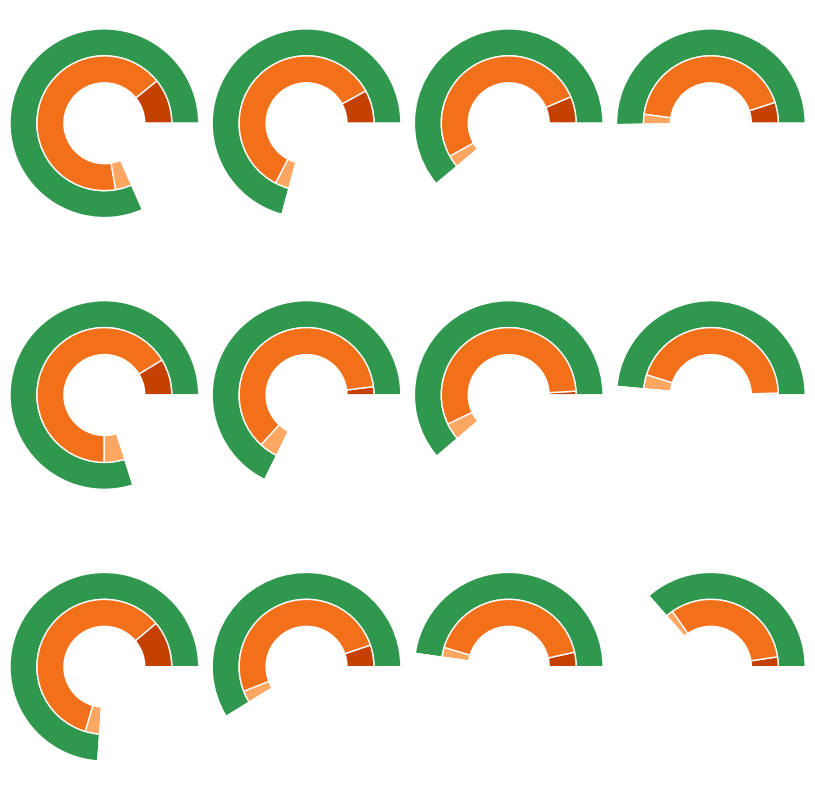

In [79]:
fig, ax = plt.subplots(figsize=(10,10), nrows = 3, ncols = 4)
for i, x in df.iterrows():
    name = x[0]
    ax_x = i//4
    ax_y = i%4
    fs, input, output, n_0,n_1,n_2,n_3 = [int(t) for t in x[1:-2]] #x[1:]
    ax[ax_x][ax_y].axis('equal')
    mypie2, _ = ax[ax_x][ax_y].pie([output+n_3, input-output-n_3], radius=1.4, colors=[plt.cm.Greens(0.7),'white'], startangle=0)
    plt.setp(mypie2, width=0.4, edgecolor='white')

    mypie3, _ = ax[ax_x][ax_y].pie([n_2,n_0,n_1,n_3,input-(n_0+n_1+n_2+n_3)], radius=1, colors=[plt.cm.Oranges(0.8), plt.cm.Oranges(0.6),plt.cm.Oranges(0.4),'grey','white'], startangle=0)
    plt.setp(mypie3, width=0.4, edgecolor='white')
    ax[ax_x][ax_y].margins(0,0)

plt.savefig(f'/Users/kexindong/Documents/GitHub/Output/h2m_database/figures/database/pie_plot_fs.svg', bbox_inches='tight')
plt.show()

In [77]:
df['percet_modelable'] = df['Num_Output']/df['Num_Input']
df['percet_non_extension'] = df['Class_3']/df['Num_Input']
df.to_csv('/Users/kexindong/Documents/GitHub/Output/h2m_database/database-output-final/fs_stat.csv', index = False)
df

,Database,Flank_Size,Num_Input,Num_Output,Class_0,Class_1,Class_2,Class_3,percet_modelable,percet_non_extension
0,AACR,1,803974,656168,537651,31913,86915,0,0.816156,0.0
1,AACR,5,803974,569309,478084,27402,63953,0,0.708119,0.0
2,AACR,11,803974,491026,415992,23561,51537,0,0.610749,0.0
3,AACR,21,803974,403953,344597,19107,40282,0,0.502445,0.0
4,COSMIC,1,1044671,834682,692349,52114,90869,0,0.798990,0.0
5,COSMIC,5,1044671,707170,639845,46937,20680,0,0.676931,0.0
6,COSMIC,11,1044671,639560,587041,43216,9494,0,0.612212,0.0
7,COSMIC,21,1044671,507215,466917,35535,4851,0,0.485526,0.0
8,CLINVAR,1,2038473,1506299,1209054,71314,226858,0,0.738935,0.0
9,CLINVAR,5,2038473,1198748,1034049,58723,106341,0,0.588062,0.0


### (2) Statistics stratified by mutation types and classifications, taking flank_size = 2 as example  

- coding region or not  

In [143]:
fs = 2
name_list = ['aacr','cosmic','clinvar']
list_of_n = []
list_of_fs = []
list_of_input = []
list_of_output = []
list_of_class_0 = []
list_of_class_1 = []
list_of_class_2 = []
list_of_class_3 = []
list_of_region = []
for x in [0,1,2]:
    name = name_list[x]
    df = pd.read_csv(f'/Users/gorkordkx/Documents/Output/h2m/1_murine_mutation_database_output/{name}_output/{name}_result_f{fs}.csv')
    for i,exon_list in enumerate([['E'],['I','n']]):
        list_of_region.append(['coding','non-coding'][i])
        list_of_n.append(name)
        list_of_fs.append(fs)
        df_sub = df[[str(x)[0] in exon_list for x in df['exon_h']]].reset_index(drop=True)
        l_1 = len(df_sub['index'].unique())
        df_sub_2 = df_sub[df_sub['status']==True]
        l_2 = len(df_sub_2['index'].unique())
        print(f'{name} in {list_of_region[i]}: {l_2} out of {l_1} ({l_2/l_1* 100:.2f}%) mutations can be modeled.\n')
        list_of_output.append(l_2)
        list_of_input.append(l_1)
        list_of_class_0.append(len(df_sub[df_sub['class']==0]['index'].unique()))
        list_of_class_1.append(len(df_sub[df_sub['class']==1]['index'].unique()))
        list_of_class_2.append(len(df_sub[df_sub['class']==2]['index'].unique()))
        list_of_class_3.append(len(df_sub[df_sub['class']==3]['index'].unique()))

In [161]:
df = pd.DataFrame(zip(list_of_n, list_of_fs,list_of_region,
list_of_input,
list_of_output,
list_of_class_0,
list_of_class_1,
list_of_class_2,
list_of_class_3))
df.columns = ['Database','Flank_Size','Region','Num_Input','Num_Output','Class_0','Class_1','Class_2','Class_3']
df

,Database,Flank_Size,Region,Num_Input,Num_Output,Class_0,Class_1,Class_2,Class_3
0,aacr,2,coding,742931,478454,412111,23429,42914,440
1,aacr,2,non-coding,56737,17512,678,0,16834,0
2,cosmic,2,coding,388436,257413,242658,14167,588,459
3,cosmic,2,non-coding,210377,39785,218,0,39567,0
4,clinvar,2,coding,1671218,931832,836504,47670,47658,2194
5,clinvar,2,non-coding,349869,68365,953,0,67412,0


In [166]:
# move stop-codon mutations to coding classification
list_y = [678,-678,218,-218,953,-953]

df['Num_Input'] = [x+y for x,y in zip(df['Num_Input'],list_y)]
df['Num_Output'] = [x+y for x,y in zip(df['Num_Output'],list_y)]
df['Class_0'] = [x+y for x,y in zip(df['Class_0'],list_y)]
df

,Database,Flank_Size,Region,Num_Input,Num_Output,Class_0,Class_1,Class_2,Class_3
0,aacr,2,coding,743609,479132,412789,23429,42914,440
1,aacr,2,non-coding,56059,16834,0,0,16834,0
2,cosmic,2,coding,388654,257631,242876,14167,588,459
3,cosmic,2,non-coding,210159,39567,0,0,39567,0
4,clinvar,2,coding,1672171,932785,837457,47670,47658,2194
5,clinvar,2,non-coding,348916,67412,0,0,67412,0


In [167]:
df['percet_modelable'] = df['Num_Output']/df['Num_Input']
df.to_csv('/Users/gorkordkx/Documents/Output/h2m/sta_3.csv', index = False)
df

,Database,Flank_Size,Region,Num_Input,Num_Output,Class_0,Class_1,Class_2,Class_3,percet_modelable
0,aacr,2,coding,743609,479132,412789,23429,42914,440,0.644333
1,aacr,2,non-coding,56059,16834,0,0,16834,0,0.300291
2,cosmic,2,coding,388654,257631,242876,14167,588,459,0.662880
3,cosmic,2,non-coding,210159,39567,0,0,39567,0,0.188272
4,clinvar,2,coding,1672171,932785,837457,47670,47658,2194,0.557829
5,clinvar,2,non-coding,348916,67412,0,0,67412,0,0.193204


bar plot  

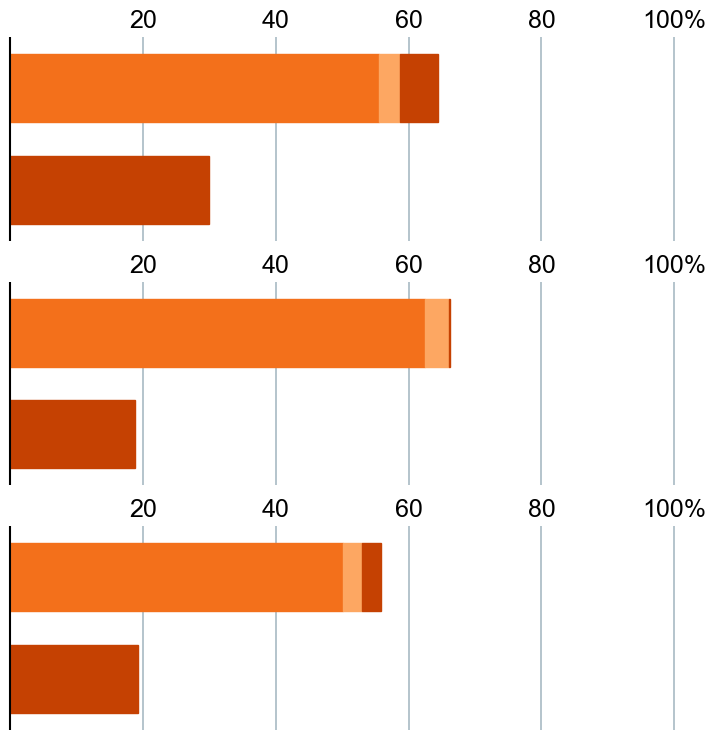

In [182]:
fig, ax = plt.subplots(nrows = 3, ncols = 1,figsize=(9, 9), sharex=True)
for t in [0,1,2]:
    name = name_list[t]
    x,y = df.iloc[2*t,3:9],df.iloc[2*t+1,3:9]
    x = x/x[0]
    y = y/y[0]
    bars = ax[t].barh([0.6, 0.3], [1,1], height = 0.2, color = 'white',alpha=0,edgecolor = 'black')
    for bar in bars:
        bar.set_linestyle('--')
        bar.set_linewidth(1)
    ax[t].barh([0.6, 0.3], [x[2],y[2]], height = 0.2, color = plt.cm.Oranges(0.6) , edgecolor = plt.cm.Oranges(0.6))
    ax[t].barh([0.6, 0.3], [x[3],y[3]], left = [x[2],y[2]], height = 0.2, color = plt.cm.Oranges(0.4), edgecolor = plt.cm.Oranges(0.4))
    ax[t].barh([0.6, 0.3], [x[4],y[4]], left = [x[2]+x[3],y[2]+y[3]], height = 0.2, color = plt.cm.Oranges(0.8), edgecolor = plt.cm.Oranges(0.8))
    ax[t].xaxis.set_ticks([.2,.4,.6,.8,1])
    ax[t].xaxis.set_ticklabels(['20','40','60','80','100%'], size=18, fontfamily="Arial", fontweight=100)
    ax[t].xaxis.set_tick_params(labelbottom=False, labeltop=True, length=0)
    ax[t].set_ylim((.15, .75))
    ax[t].set_axisbelow(True)
    ax[t].grid(axis = "x", color="#A8BAC4", lw=1.2)
    ax[t].spines["right"].set_visible(False)
    ax[t].spines["top"].set_visible(False)
    ax[t].spines["bottom"].set_visible(False)
    ax[t].spines["left"].set_lw(1.5)
    ax[t].spines["left"].set_capstyle("butt")
    ax[t].yaxis.set_visible(False)

plt.savefig(f'/Users/gorkordkx/Documents/Output/h2m/bar_coding_fs_2.svg', bbox_inches='tight')
plt.show()

- detailed loci (exonic/splice site/deep intronic)

In [26]:
fs = 2
name_list = ['aacr','cosmic','clinvar']
list_of_n = []
list_of_fs = []
list_of_input = []
list_of_output = []
list_of_class_0 = []
list_of_class_1 = []
list_of_class_2 = []
list_of_class_3 = []
list_of_region = []
for x in [0,1,2]:
    name = name_list[x]
    df = pd.read_csv(f'/Users/gorkordkx/Documents/Output/h2m/1_murine_mutation_database_output/{name}_output/{name}_result_f{fs}.csv')
    # SNV-only
    df = df[df['type_h']=='SNP'].reset_index(drop=True)
    # exonic muts
    df_sub = df[[('E' in str(x)) for x in df['exon_h']]].reset_index(drop=True)
    list_of_region.append('Exonic')
    list_of_n.append(name)
    list_of_fs.append(fs)
    l_1 = len(df_sub['index'].unique())
    df_sub_2 = df_sub[df_sub['status']==True]
    l_2 = len(df_sub_2['index'].unique())
    print(f'{name} in Exonic Region: {l_2} out of {l_1} ({l_2/l_1* 100:.2f}%) mutations can be modeled.\n')
    list_of_output.append(l_2)
    list_of_input.append(l_1)
    list_of_class_0.append(len(df_sub[df_sub['class']==0]['index'].unique()))
    list_of_class_1.append(len(df_sub[df_sub['class']==1]['index'].unique()))
    list_of_class_2.append(len(df_sub[df_sub['class']==2]['index'].unique()))
    list_of_class_3.append(len(df_sub[df_sub['class']==3]['index'].unique()))

    # splicing muts
    df_sub= df[[('splice' in str(x)) for x in df['HGVSp_h']]].reset_index(drop=True)
    list_of_region.append('Splice_Site')
    list_of_n.append(name)
    list_of_fs.append(fs)
    l_1 = len(df_sub['index'].unique())
    df_sub_2 = df_sub[df_sub['status']==True]
    l_2 = len(df_sub_2['index'].unique())
    print(f'{name} in Splice Site: {l_2} out of {l_1} ({l_2/l_1* 100:.2f}%) mutations can be modeled.\n')
    list_of_output.append(l_2)
    list_of_input.append(l_1)
    list_of_class_0.append(len(df_sub[df_sub['class']==0]['index'].unique()))
    list_of_class_1.append(len(df_sub[df_sub['class']==1]['index'].unique()))
    list_of_class_2.append(len(df_sub[df_sub['class']==2]['index'].unique()))
    list_of_class_3.append(len(df_sub[df_sub['class']==3]['index'].unique()))
    
    # deep intronic muts
    list_a = [('I' in str(x)) for x in df['exon_h']]
    list_b = [('splice' not in str(x)) for x in df['HGVSp_h']]
    list_bind = [(x and y) for x,y in zip(list_a,list_b)]
    df_sub = df[list_bind].reset_index(drop=True)
    list_of_region.append('Deep_Intronic')
    list_of_n.append(name)
    list_of_fs.append(fs)
    l_1 = len(df_sub['index'].unique())
    df_sub_2 = df_sub[df_sub['status']==True]
    l_2 = len(df_sub_2['index'].unique())
    print(f'{name} in Deep Intronic Region: {l_2} out of {l_1} ({l_2/l_1* 100:.2f}%) mutations can be modeled.\n')
    list_of_output.append(l_2)
    list_of_input.append(l_1)
    list_of_class_0.append(len(df_sub[df_sub['class']==0]['index'].unique()))
    list_of_class_1.append(len(df_sub[df_sub['class']==1]['index'].unique()))
    list_of_class_2.append(len(df_sub[df_sub['class']==2]['index'].unique()))
    list_of_class_3.append(len(df_sub[df_sub['class']==3]['index'].unique()))

aacr in Exonic Region: 415843 out of 642315 (64.74%) mutations can be modeled.

aacr in Splice Site: 6479 out of 14118 (45.89%) mutations can be modeled.

aacr in Deep Intronic Region: 7824 out of 31010 (25.23%) mutations can be modeled.

cosmic in Exonic Region: 253641 out of 382391 (66.33%) mutations can be modeled.

cosmic in Splice Site: 3547 out of 7638 (46.44%) mutations can be modeled.

cosmic in Deep Intronic Region: 27564 out of 171031 (16.12%) mutations can be modeled.

clinvar in Exonic Region: 871366 out of 1555874 (56.00%) mutations can be modeled.

clinvar in Splice Site: 10578 out of 23806 (44.43%) mutations can be modeled.

clinvar in Deep Intronic Region: 44845 out of 223498 (20.07%) mutations can be modeled.



In [27]:
df = pd.DataFrame(zip(list_of_n, list_of_fs,list_of_region,
list_of_input,
list_of_output,
list_of_class_0,
list_of_class_1,
list_of_class_2,
list_of_class_3))
df.columns = ['Database','Flank_Size','Mutation_Type','Num_Input','Num_Output','Class_0','Class_1','Class_2','Class_3']
df

,Database,Flank_Size,Mutation_Type,Num_Input,Num_Output,Class_0,Class_1,Class_2,Class_3
0,aacr,2,Exonic,642315,415843,393282,22561,0,294
1,aacr,2,Splice_Site,14118,6479,0,0,6479,0
2,aacr,2,Deep_Intronic,31010,7824,0,0,7824,0
3,cosmic,2,Exonic,382391,253641,239703,13938,0,455
4,cosmic,2,Splice_Site,7638,3547,0,0,3547,0
5,cosmic,2,Deep_Intronic,171031,27564,0,0,27564,0
6,clinvar,2,Exonic,1555874,871366,823932,47434,0,1968
7,clinvar,2,Splice_Site,23806,10578,0,0,10578,0
8,clinvar,2,Deep_Intronic,223498,44845,0,0,44845,0


In [28]:
df['percet_modelable'] = df['Num_Output']/df['Num_Input']
df.to_csv('/Users/gorkordkx/Documents/Output/h2m/stat_3_v2.csv', index = False)
df

,Database,Flank_Size,Mutation_Type,Num_Input,Num_Output,Class_0,Class_1,Class_2,Class_3,percet_modelable
0,aacr,2,Exonic,642315,415843,393282,22561,0,294,0.647413
1,aacr,2,Splice_Site,14118,6479,0,0,6479,0,0.458918
2,aacr,2,Deep_Intronic,31010,7824,0,0,7824,0,0.252306
3,cosmic,2,Exonic,382391,253641,239703,13938,0,455,0.663303
4,cosmic,2,Splice_Site,7638,3547,0,0,3547,0,0.464389
5,cosmic,2,Deep_Intronic,171031,27564,0,0,27564,0,0.161164
6,clinvar,2,Exonic,1555874,871366,823932,47434,0,1968,0.560049
7,clinvar,2,Splice_Site,23806,10578,0,0,10578,0,0.444342
8,clinvar,2,Deep_Intronic,223498,44845,0,0,44845,0,0.200651


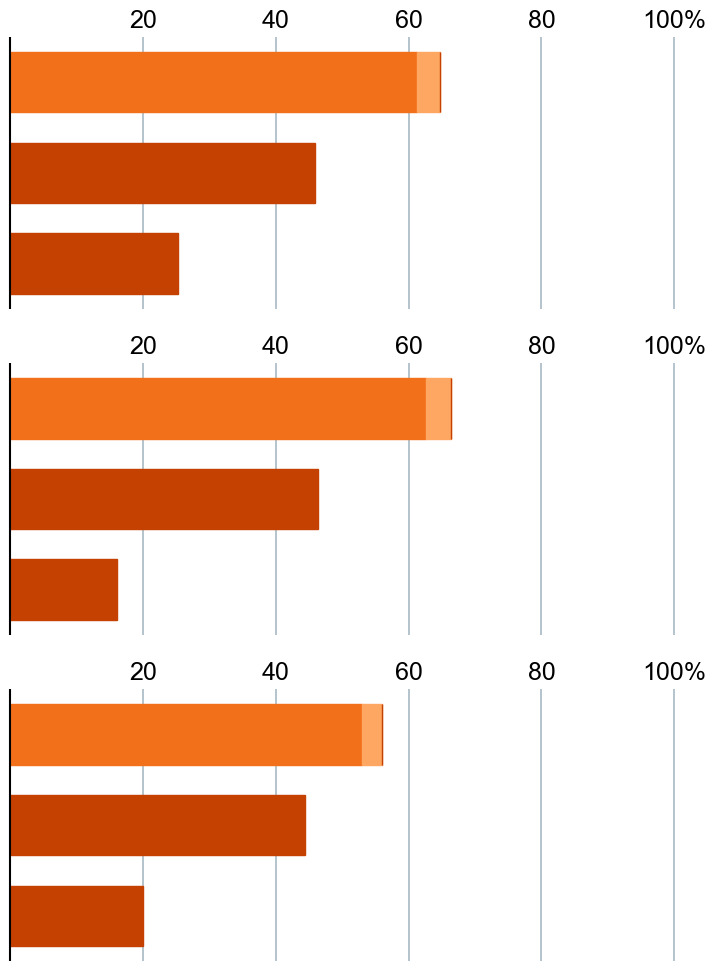

In [31]:
fig, ax = plt.subplots(nrows = 3, ncols = 1,figsize=(9, 12), sharex=True)
for t in [0,1,2]:
    name = name_list[t]
    x,y,z = df.iloc[3*t,3:9],df.iloc[3*t+1,3:9], df.iloc[3*t+2,3:9]
    x = x/x[0]
    y = y/y[0]
    z = z/z[0]
    bars = ax[t].barh([0.9,0.6, 0.3], [1,1,1], height = 0.2, color = 'white',alpha=0,edgecolor = 'black')
    for bar in bars:
        bar.set_linestyle('--')
        bar.set_linewidth(1)
    ax[t].barh([0.9,0.6, 0.3], [x[2],y[2],z[2]], height = 0.2, color = plt.cm.Oranges(0.6) , edgecolor = plt.cm.Oranges(0.6))
    ax[t].barh([0.9,0.6, 0.3], [x[3],y[3],z[3]], left = [x[2],y[2],z[2]], height = 0.2, color = plt.cm.Oranges(0.4), edgecolor = plt.cm.Oranges(0.4))
    ax[t].barh([0.9,0.6, 0.3], [x[4],y[4],z[4]], left = [x[2]+x[3],y[2]+y[3],z[2]+z[3]], height = 0.2, color = plt.cm.Oranges(0.8), edgecolor = plt.cm.Oranges(0.8))
    ax[t].xaxis.set_ticks([.2,.4,.6,.8,1])
    ax[t].xaxis.set_ticklabels(['20','40','60','80','100%'], size=18, fontfamily="Arial", fontweight=100)
    ax[t].xaxis.set_tick_params(labelbottom=False, labeltop=True, length=0)
    ax[t].set_ylim((.15, 1.05))
    ax[t].set_axisbelow(True)
    ax[t].grid(axis = "x", color="#A8BAC4", lw=1.2)
    ax[t].spines["right"].set_visible(False)
    ax[t].spines["top"].set_visible(False)
    ax[t].spines["bottom"].set_visible(False)
    ax[t].spines["left"].set_lw(1.5)
    ax[t].spines["left"].set_capstyle("butt")
    ax[t].yaxis.set_visible(False)

plt.savefig(f'/Users/gorkordkx/Documents/Output/h2m/bar_region_snv_only_fs_2.svg', bbox_inches='tight')
plt.show()

- Mutation Type  

In [185]:
fs = 2
list_of_n = []
list_of_fs = []
list_of_input = []
list_of_output = []
list_of_class_0 = []
list_of_class_1 = []
list_of_class_2 = []
list_of_class_3 = []
list_of_region = []
for x in [0,1,2]:
    name = name_list[x]
    df = pd.read_csv(f'/Users/gorkordkx/Documents/Output/h2m/1_murine_mutation_database_output/{name}_output/{name}_result_f{fs}.csv')
    for i,type_list in enumerate([['SNP','DNP','ONP'],['INS'],['DEL']]):
        list_of_region.append(['Substitution','Insertion','Deletion'][i])
        list_of_n.append(name)
        list_of_fs.append(fs)
        df_sub = df[[x in type_list for x in df['type_h']]].reset_index(drop=True)
        l_1 = len(df_sub['index'].unique())
        df_sub_2 = df_sub[df_sub['status']==True]
        l_2 = len(df_sub_2['index'].unique())
        print(f'{name} in {list_of_region[i]}: {l_2} out of {l_1} ({l_2/l_1* 100:.2f}%) mutations can be modeled.\n')
        list_of_output.append(l_2)
        list_of_input.append(l_1)
        list_of_class_0.append(len(df_sub[df_sub['class']==0]['index'].unique()))
        list_of_class_1.append(len(df_sub[df_sub['class']==1]['index'].unique()))
        list_of_class_2.append(len(df_sub[df_sub['class']==2]['index'].unique()))
        list_of_class_3.append(len(df_sub[df_sub['class']==3]['index'].unique()))

aacr in Substitution: 442045 out of 707743 (62.46%) mutations can be modeled.

aacr in Insertion: 17136 out of 26913 (63.67%) mutations can be modeled.

aacr in Deletion: 36785 out of 65012 (56.58%) mutations can be modeled.

cosmic in Substitution: 296218 out of 597236 (49.60%) mutations can be modeled.

cosmic in Insertion: 281 out of 428 (65.65%) mutations can be modeled.

cosmic in Deletion: 699 out of 1149 (60.84%) mutations can be modeled.

clinvar in Substitution: 936484 out of 1871290 (50.04%) mutations can be modeled.

clinvar in Insertion: 20129 out of 45091 (44.64%) mutations can be modeled.

clinvar in Deletion: 43584 out of 104706 (41.63%) mutations can be modeled.



In [186]:
df = pd.DataFrame(zip(list_of_n, list_of_fs,list_of_region,
list_of_input,
list_of_output,
list_of_class_0,
list_of_class_1,
list_of_class_2,
list_of_class_3))
df.columns = ['Database','Flank_Size','Mutation_Type','Num_Input','Num_Output','Class_0','Class_1','Class_2','Class_3']
df

,Database,Flank_Size,Mutation_Type,Num_Input,Num_Output,Class_0,Class_1,Class_2,Class_3
0,aacr,2,Substitution,707743,442045,403312,23309,15424,295
1,aacr,2,Insertion,26913,17136,2589,53,14494,0
2,aacr,2,Deletion,65012,36785,6888,67,29830,145
3,cosmic,2,Substitution,597236,296218,242494,14158,39566,458
4,cosmic,2,Insertion,428,281,92,4,185,0
5,cosmic,2,Deletion,1149,699,290,5,404,1
6,clinvar,2,Substitution,1871290,936484,827374,47607,61503,1972
7,clinvar,2,Insertion,45091,20129,2665,33,17431,0
8,clinvar,2,Deletion,104706,43584,7418,30,36136,222


In [187]:
df['percet_modelable'] = df['Num_Output']/df['Num_Input']
df.to_csv('/Users/gorkordkx/Documents/Output/h2m/sta_4.csv', index = False)
df

,Database,Flank_Size,Mutation_Type,Num_Input,Num_Output,Class_0,Class_1,Class_2,Class_3,percet_modelable
0,aacr,2,Substitution,707743,442045,403312,23309,15424,295,0.624584
1,aacr,2,Insertion,26913,17136,2589,53,14494,0,0.636718
2,aacr,2,Deletion,65012,36785,6888,67,29830,145,0.565819
3,cosmic,2,Substitution,597236,296218,242494,14158,39566,458,0.495981
4,cosmic,2,Insertion,428,281,92,4,185,0,0.656542
5,cosmic,2,Deletion,1149,699,290,5,404,1,0.608355
6,clinvar,2,Substitution,1871290,936484,827374,47607,61503,1972,0.500448
7,clinvar,2,Insertion,45091,20129,2665,33,17431,0,0.446408
8,clinvar,2,Deletion,104706,43584,7418,30,36136,222,0.416251


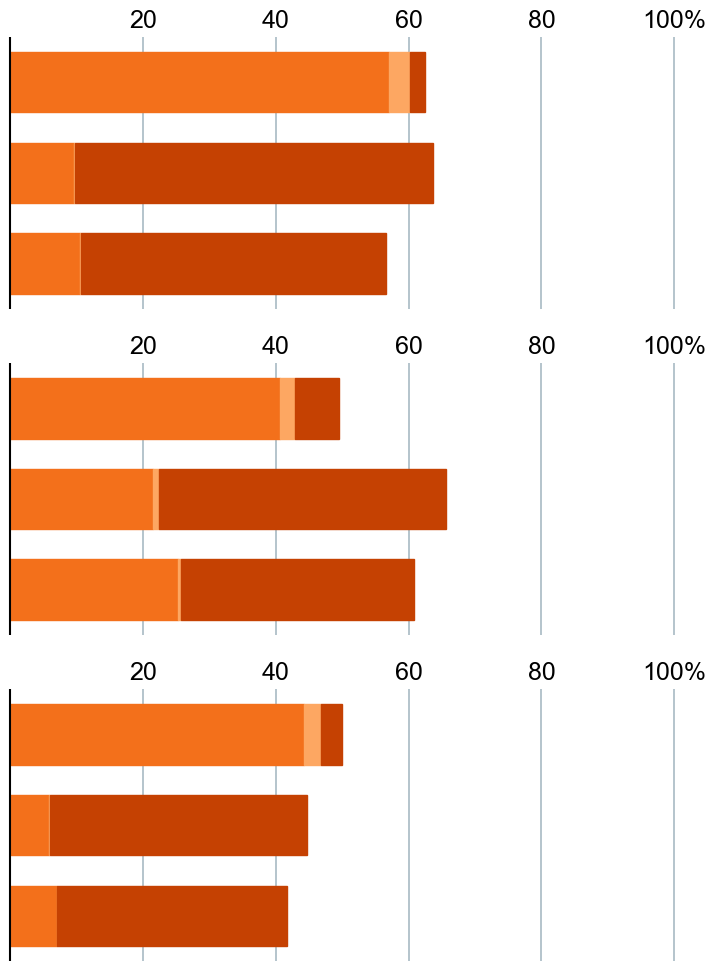

In [193]:
fig, ax = plt.subplots(nrows = 3, ncols = 1,figsize=(9, 12), sharex=True)
for t in [0,1,2]:
    name = name_list[t]
    x,y,z = df.iloc[3*t,3:9],df.iloc[3*t+1,3:9], df.iloc[3*t+2,3:9]
    x = x/x[0]
    y = y/y[0]
    z = z/z[0]
    bars = ax[t].barh([0.9,0.6, 0.3], [1,1,1], height = 0.2, color = 'white',alpha=0,edgecolor = 'black')
    for bar in bars:
        bar.set_linestyle('--')
        bar.set_linewidth(1)
    ax[t].barh([0.9,0.6, 0.3], [x[2],y[2],z[2]], height = 0.2, color = plt.cm.Oranges(0.6) , edgecolor = plt.cm.Oranges(0.6))
    ax[t].barh([0.9,0.6, 0.3], [x[3],y[3],z[3]], left = [x[2],y[2],z[2]], height = 0.2, color = plt.cm.Oranges(0.4), edgecolor = plt.cm.Oranges(0.4))
    ax[t].barh([0.9,0.6, 0.3], [x[4],y[4],z[4]], left = [x[2]+x[3],y[2]+y[3],z[2]+z[3]], height = 0.2, color = plt.cm.Oranges(0.8), edgecolor = plt.cm.Oranges(0.8))
    ax[t].xaxis.set_ticks([.2,.4,.6,.8,1])
    ax[t].xaxis.set_ticklabels(['20','40','60','80','100%'], size=18, fontfamily="Arial", fontweight=100)
    ax[t].xaxis.set_tick_params(labelbottom=False, labeltop=True, length=0)
    ax[t].set_ylim((.15, 1.05))
    ax[t].set_axisbelow(True)
    ax[t].grid(axis = "x", color="#A8BAC4", lw=1.2)
    ax[t].spines["right"].set_visible(False)
    ax[t].spines["top"].set_visible(False)
    ax[t].spines["bottom"].set_visible(False)
    ax[t].spines["left"].set_lw(1.5)
    ax[t].spines["left"].set_capstyle("butt")
    ax[t].yaxis.set_visible(False)

plt.savefig(f'/Users/gorkordkx/Documents/Output/h2m/bar_type_fs_2.svg', bbox_inches='tight')
plt.show()

In [93]:
df_input = pd.read_csv('/Users/kexindong/Documents/GitHub/Output/h2m_database/BEGG/be_result_all.csv')

In [94]:
len(df_input['ID'].unique())

4612

In [91]:
len(df_input[['-V' in x for x in df_input['ID']]]['ID'].unique())

4707

In [92]:
9884-4707

5177

In [86]:
len(df_input['ID'].unique())

4798

In [95]:
len(df_input[['-V' in x for x in df_input['ID']]]['ID'].unique())

1892

In [97]:
4612-1892

2720

In [ ]:
drawBar(0.3, a-b, b, color = 'grey')
plt.bar(0.3, d, color=plt.cm.Purples(0.7), width = 0.2, edgecolor = 'tab:red', linewidth=3)
ax.yaxis.set_ticks([x*10000 for x in [50,100,150,200,250]])
ax.yaxis.set_ticklabels(['.5M', '1M', '1.5M', '2M', '2.5M'], size=25, fontfamily="Arial", fontweight=100)

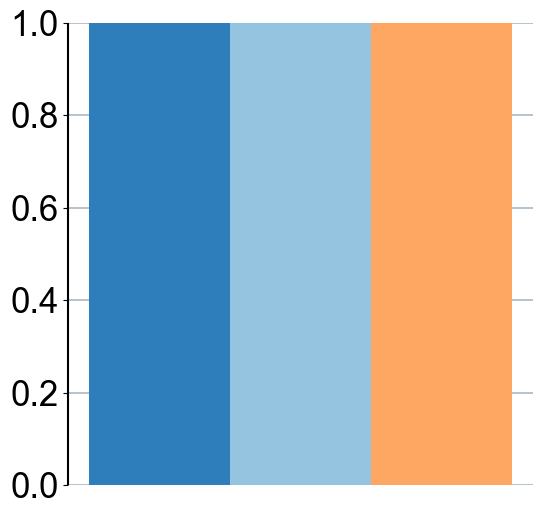

In [99]:
def drawBar(x1, y1, bottom, color):
    plt.bar(x1, y1, bottom=bottom, color=color, width = 0.2)
fig, ax = plt.subplots(figsize=(6,6))
drawBar(0.2, 5183, 0, color = plt.cm.Blues(0.7))
drawBar(0.4, 5177, 0, color = plt.cm.Blues(0.4))
drawBar(0.6, 4798, 0, color = plt.cm.Oranges(0.4))

ax.set_ylim((0, 1))
# ax.yaxis.set_tick_params(labelbottom=False, labeltop=True, length=0)
ax.set_axisbelow(True)
ax.grid(axis = "y", color="#A8BAC4", lw=1.2)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["left"].set_lw(1.5)
ax.spines["left"].set_capstyle("butt")
ax.xaxis.set_visible(False)
plt.xticks([])
plt.yticks(fontsize = 25)
#plt.savefig(f'/Users/gorkordkx/Documents/Output/h2m/bar_{name[i]}.svg', bbox_inches='tight')
plt.show()

In [ ]:
len(df_input['ID'].unique())

### (3) Coverage of p53 mutations  

In [11]:
name = 'aacr'
fs = 2
df = pd.read_csv(f'/Users/gorkordkx/Documents/Output/h2m/1_murine_mutation_database_output/{name}_output/{name}_result_f{fs}.csv')
df = df[df['gene_name_h']=='TP53']


In [ ]:

# 使用正则表达式搜索数字
def search_loc(s):
    match = re.search(r':c\.(\d+)', s)
    if match:
        number = match.group(1)
        return int(number)
    else:
        return None
    
df['loc_h'] = [search_loc(s) for s in  df['HGVSc_h']]

color_dict = dict({
    'gene':plt.cm.Purples(0.7), 
    'flank':plt.cm.Greens(0.7), 
    'nce4nce':plt.cm.Oranges(0.8), 
    'nce4pce': plt.cm.Oranges(0.6), 
    'pce4pce':plt.cm.Oranges(0.4),
    'coding':'#018175', #codig
    'noncoding':'#FEE3B2', #non-coding
    'SNP':"#D862BC", 
    'ONP':"#675a85",
    'INS':plt.cm.Greens(0.5),
    'DEL':plt.cm.Purples(0.7)
})
df_unique = df.drop_duplicates(subset = 'ID_human').reset_index(drop=True)

df_merge = pd.DataFrame({'loc':list(range(min(df_unique['loc_h']), max(df_unique['loc_h'])+1))})

df_draw_list = []
for x in [
    ['SNP','DNP','ONP'],
    ['INS'],
    ['DEL']
]:
    df_temp = df_unique[df_unique['type_h'].isin(x)].reset_index(drop=True)
    df_draw = pd.DataFrame(df_temp['loc_h'].value_counts()).reset_index(drop=False)
    df_draw = df_draw.rename(columns={'index':'loc',
                                      'loc_h':'count'})
    df_draw['s'] = 'h'
    df_draw = pd.merge(df_draw, df_merge, how = 'right', on = 'loc')
    df_draw['count'].fillna(0,inplace=True)
    df_draw['s'].fillna('h',inplace=True)
    df_draw = df_draw.sort_values(by = 'loc').reset_index(drop=True)
    df_draw_list.append(df_draw)
df_unique_mouse = df_unique[df_unique['status']==True].reset_index(drop=True)
df_unique_mouse['loc_m'] = [search_loc(s) for s in  df_unique_mouse['HGVSc_m']]
df_merge = pd.DataFrame({'loc':list(range(min(df_unique['loc_h']), max(df_unique['loc_h'])+1))})

df_draw_list_mouse = []
for x in [
    ['SNP','DNP','ONP','TNP'],
    ['INS'],
    ['DEL']
]:
    df_temp = df_unique_mouse[df_unique_mouse['type_m'].isin(x)].reset_index(drop=True)
    df_draw = pd.DataFrame(df_temp['loc_m'].value_counts()).reset_index(drop=False)
    df_draw = df_draw.rename(columns={'index':'loc',
                                      'loc_m':'count'})
    df_draw['s'] = 'm'
    df_draw = pd.merge(df_draw, df_merge, how = 'right', on = 'loc')
    df_draw['count'].fillna(0,inplace=True)
    df_draw['s'].fillna('m',inplace=True)
    df_draw = df_draw.sort_values(by = 'loc').reset_index(drop=True)
    df_draw_list_mouse.append(df_draw)

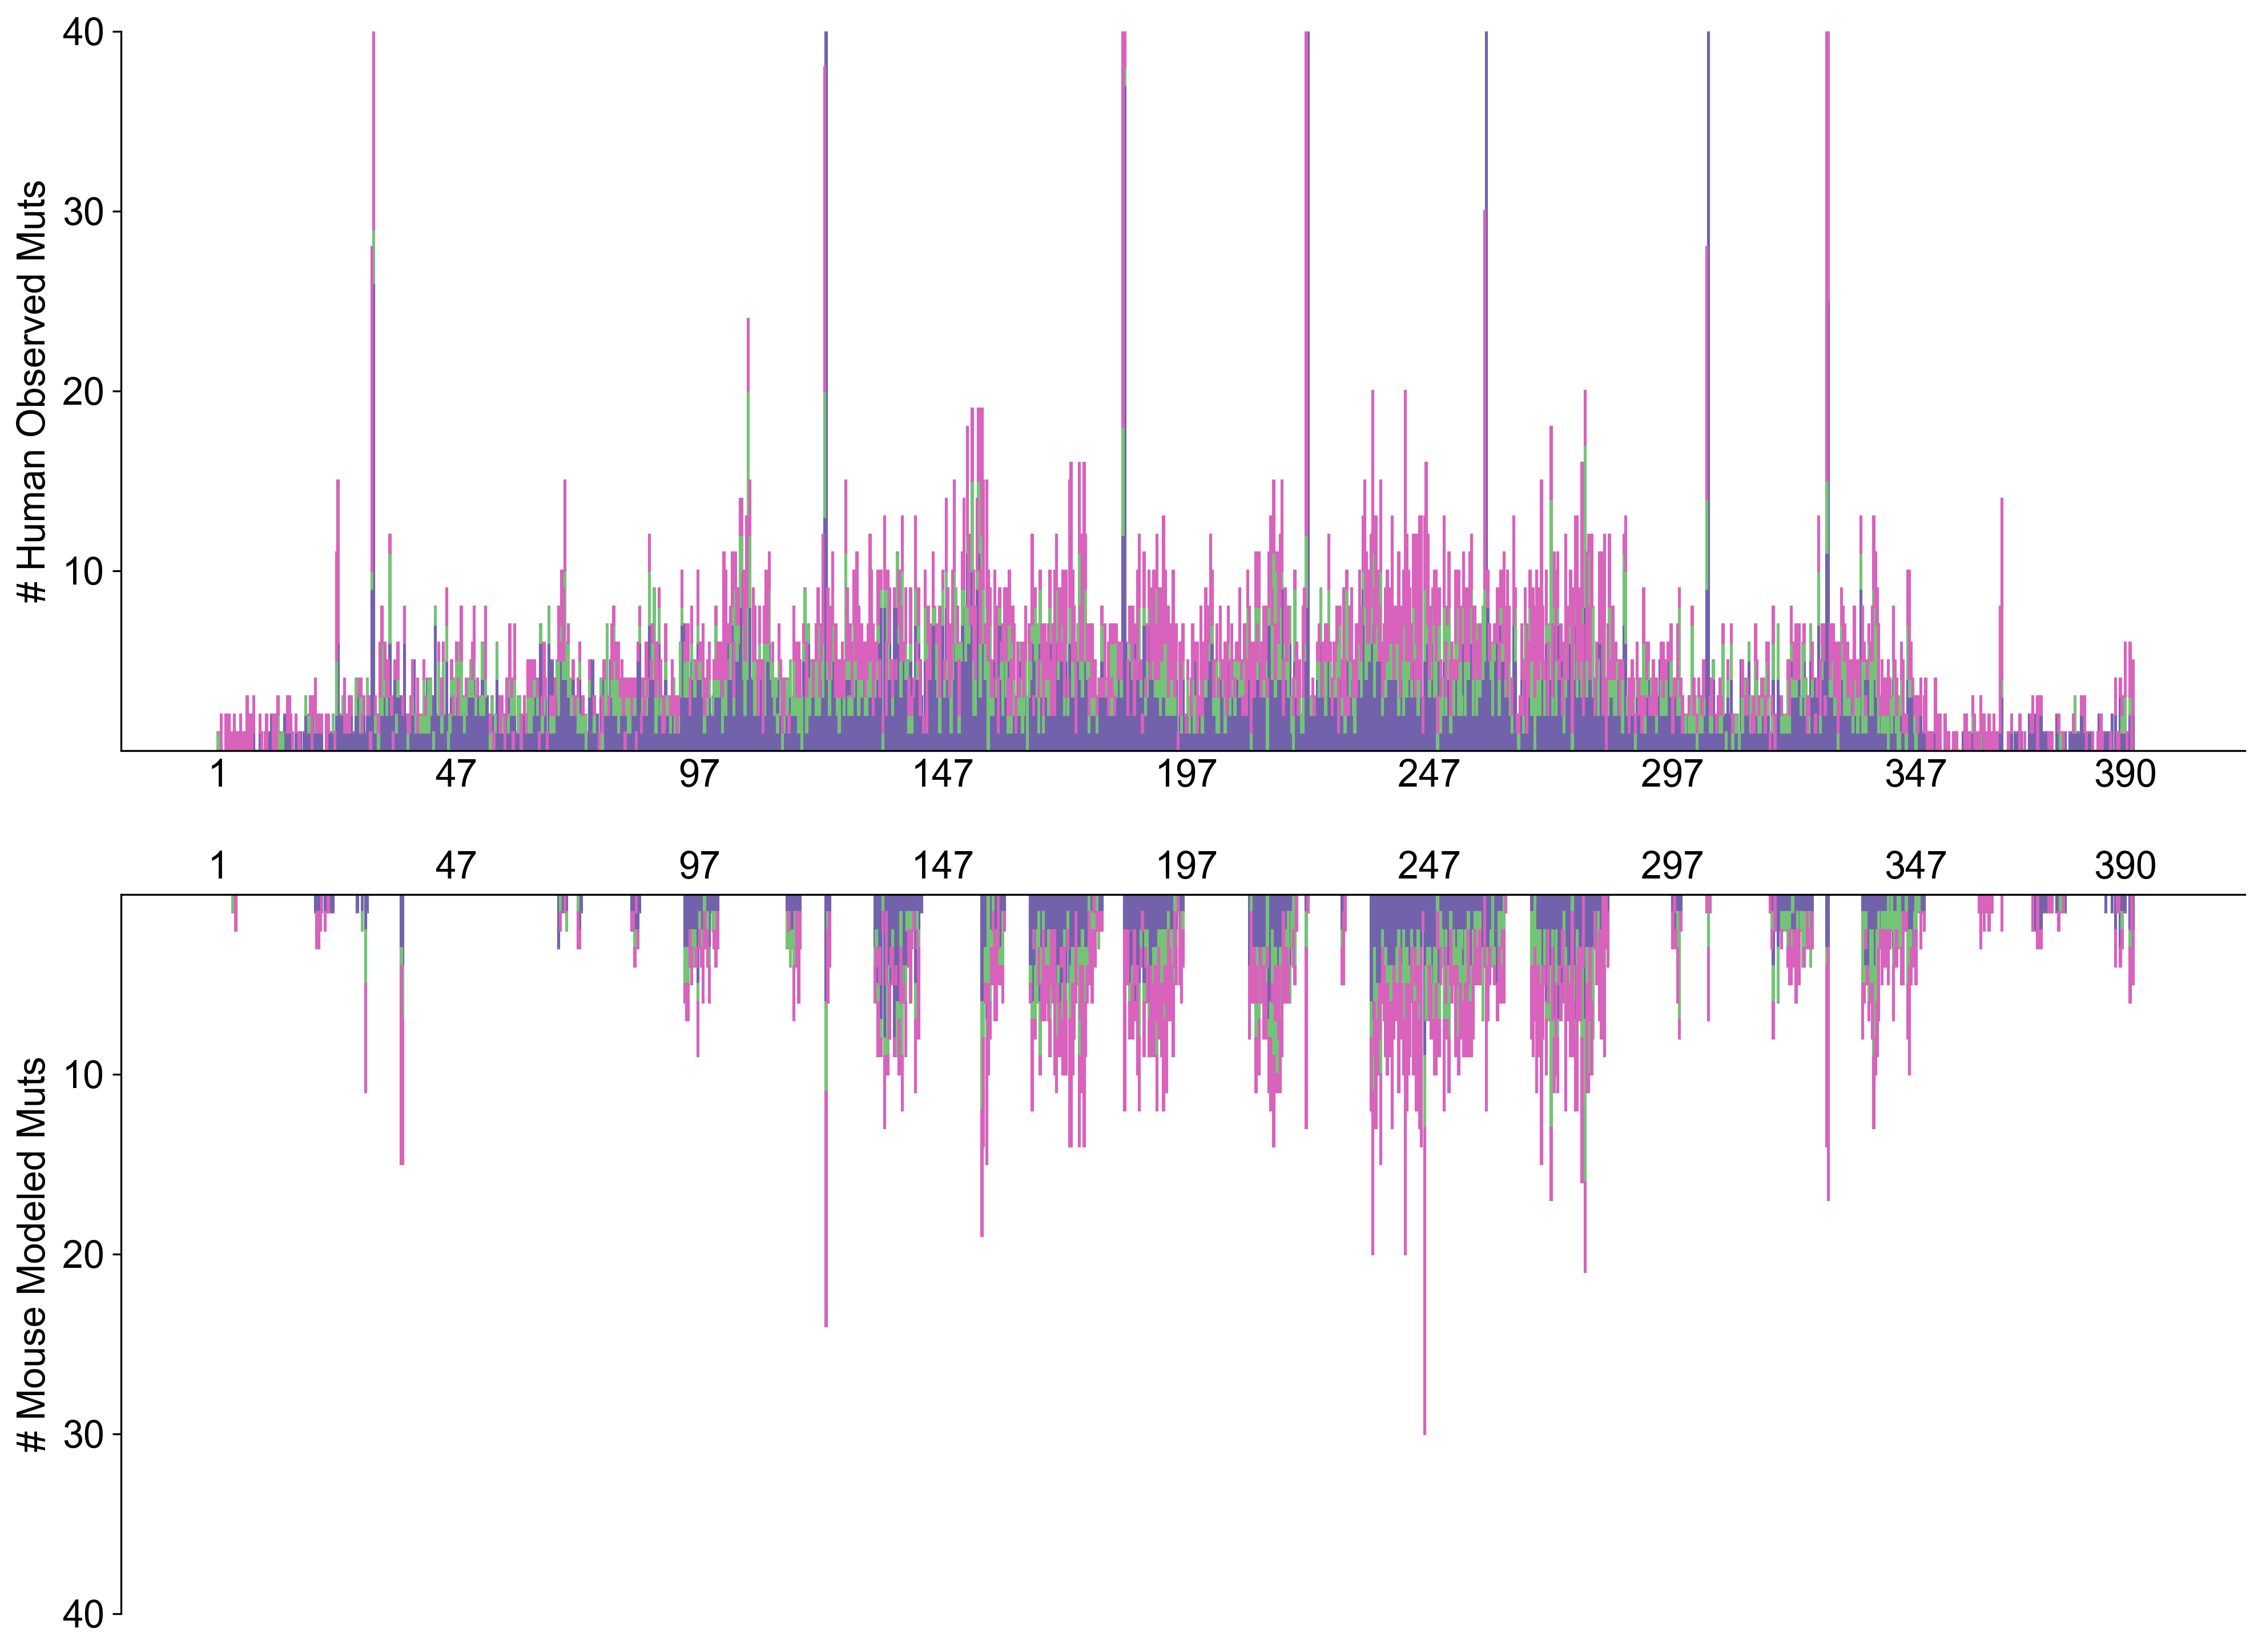

In [22]:
fig, ax = plt.subplots(2,1,figsize=(16,12), height_ratios=[1,1], sharex=True, dpi = 300)
ax[0].bar(df_draw_list[0]['loc'],df_draw_list[2]['count'], color=color_dict['DEL'], edgecolor=color_dict['DEL'], width = .5)
ax[0].bar(df_draw_list[1]['loc'],df_draw_list[1]['count'], color=color_dict['INS'], edgecolor=color_dict['INS'], bottom = df_draw_list[2]['count'], width = .5)
ax[0].bar(df_draw_list[2]['loc'],df_draw_list[0]['count'], color=color_dict['SNP'], edgecolor=color_dict['SNP'], bottom = [x+y for x,y in zip(df_draw_list[2]['count'], df_draw_list[1]['count'])], width = .5)
ax[0].spines['right'].set_visible(False)
ax[0].spines['top'].set_visible(False)
# ax[0].tick_params(axis='both', which='major', labelsize=13)

ax[0].set_ylabel('# Human Observed Muts', fontsize=16)
ax[0].set_yticks([10,20,30,40])
ax[0].set_yticklabels([10,20,30,40], fontsize=16)
ax[0].set_ylim(0,40)
ax[0].set_xticks([x*3+1 for x in [0,49,99,149,199,249,299,349,392]])
ax[0].xaxis.set_tick_params(labelbottom=True, labeltop=False, length=0)
ax[0].set_xticklabels([1,50,100,150,200,250,300,350, 393], rotation=0, fontsize=16)

ax[1].bar(df_draw_list_mouse[0]['loc']+9,-df_draw_list_mouse[2]['count'], color=color_dict['DEL'], edgecolor=color_dict['DEL'], width = .5)
ax[1].bar(df_draw_list_mouse[1]['loc']+9,-df_draw_list_mouse[1]['count'], color=color_dict['INS'], edgecolor=color_dict['INS'], bottom = -df_draw_list_mouse[2]['count'], width = .5)
ax[1].bar(df_draw_list_mouse[2]['loc']+9,-df_draw_list_mouse[0]['count'], color=color_dict['SNP'], edgecolor=color_dict['SNP'], bottom = [-(x+y) for x,y in zip(df_draw_list_mouse[1]['count'], df_draw_list_mouse[2]['count'])], width = .5)
ax[1].tick_params(axis='both', which='major', labelsize=16)
ax[1].spines['right'].set_visible(False)
ax[1].spines['bottom'].set_visible(False)

ax[1].set_ylabel('# Mouse Modeled Muts', fontsize=16)
ax[1].set_yticks([-10,-20,-30,-40])
ax[1].set_yticklabels([10,20,30,40], fontsize=16)
ax[1].set_ylim(-40,0)
ax[1].xaxis.set_tick_params(labelbottom=False, labeltop=True, length=0)
ax[1].set_xticks([x*3+1 for x in [0,49,99,149,199,249,299,349,392]])
ax[1].set_xticklabels([1,47,97,147,197,247,297,347, 390], rotation=0, fontsize=16)

plt.savefig('/Users/gorkordkx/Documents/Output/h2m/tp53_v3.svg', bbox_inches='tight')
plt.show()

In [231]:
df_draw_list[0] = df_draw_list[0].rename(columns = {'count':'count_substitution'})
df_draw_list[1] = df_draw_list[1].rename(columns = {'count':'count_insertion'})
df_draw_list[2] = df_draw_list[2].rename(columns = {'count':'count_deletion'})
df = pd.merge(df_draw_list[0], df_draw_list[1], on = ['loc','s'], how = 'outer')
df = pd.merge(df, df_draw_list[2], on = ['loc','s'], how = 'outer')
df

In [246]:
df_draw_list_mouse[0] = df_draw_list_mouse[0].rename(columns = {'count':'count_substitution'})
df_draw_list_mouse[1] = df_draw_list_mouse[1].rename(columns = {'count':'count_insertion'})
df_draw_list_mouse[2] = df_draw_list_mouse[2].rename(columns = {'count':'count_deletion'})
df_2 = pd.merge(df_draw_list_mouse[0], df_draw_list_mouse[1], on = ['loc','s'], how = 'outer')
df_2 = pd.merge(df_2, df_draw_list_mouse[2], on = ['loc','s'], how = 'outer')
df_2

,loc,count_substitution,s,count_insertion,count_deletion
0,1,0.0,m,1.0,0.0
1,2,0.0,m,0.0,0.0
2,3,2.0,m,0.0,0.0
3,4,0.0,m,0.0,0.0
4,5,0.0,m,0.0,0.0
...,...,...,...,...,...
1177,1178,0.0,m,0.0,0.0
1178,1179,0.0,m,0.0,0.0
1179,1180,0.0,m,0.0,0.0
1180,1181,0.0,m,0.0,0.0


In [247]:
pd.concat([df,df_2]).to_csv('/Users/gorkordkx/Documents/Output/h2m/sta_5.csv', index = False)